# <center> Credit Risk Prediction

<center> Author : Arya Octavian

----------

# Data Collection

## Import Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

matplotlib.rcParams['font.family'] = 'Tw Cen MT'
rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.facecolor'] = '1'

In [3]:
df_raw = pd.read_csv("loan_data_2007_2014.csv")
df_raw

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [4]:
df_raw.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Drop Unnamed: 0 column

df_raw.drop(['Unnamed: 0'],axis=1,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Check Duplicated Data

In [6]:
print('Jumlah baris dan kolom:', df_raw.shape)
print('Jumlah kolom `id`:', df_raw.id.nunique()), 
print('Jumlah kolom `member_id:', df_raw.member_id.nunique())

Jumlah baris dan kolom: (466285, 74)
Jumlah kolom `id`: 466285
Jumlah kolom `member_id: 466285


- Tidak ada identitas yang duplikat berarti 1 baris mewakili 1 individu

## Drop Fetaures 1

In [7]:
df_raw.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
130545,5618624,7000961,15000,15000,14950.0,36 months,10.16,485.14,B,B1,Oregon Symphony Association,10+ years,MORTGAGE,85000.0,Source Verified,Jun-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Ready to stop carrying credit balances,972xx,OR,15.55,2.0,Feb-91,0.0,19.0,NaN,10.0,0.0,29652,70.1,16.0,f,2374.53,2366.60,15026.94,14976.87,12625.47,2401.47,0.0,0.0,0.0,Jan-16,485.14,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,302192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42300.0,NaN,NaN,NaN
456634,10648506,12520466,20000,20000,20000.0,36 months,10.99,654.68,B,B2,"Director, Ductless Products",< 1 year,MORTGAGE,174000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/17/14 > My loan request...,debt_consolidation,Debt consolidation,300xx,GA,15.48,6.0,Nov-02,0.0,8.0,NaN,12.0,0.0,54187,60.7,30.0,w,7989.31,7989.31,15057.64,15057.64,12010.69,3046.95,0.0,0.0,0.0,Dec-15,654.68,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,488452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89200.0,NaN,NaN,NaN
245128,35853293,38548721,15000,15000,15000.0,60 months,9.49,314.96,B,B2,Teacher,10+ years,OWN,96000.0,Not Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,925xx,CA,19.98,0.0,May-88,1.0,32.0,NaN,12.0,0.0,19471,64.5,23.0,w,12322.95,12322.95,4074.71,4074.71,2677.05,1397.66,0.0,0.0,0.0,Dec-15,314.96,Feb-16,Jan-16,0.0,32.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,311677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30200.0,NaN,NaN,NaN


In [8]:
df_raw.isna().sum().sort_values(ascending=False)

inq_last_12m                   466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
dti_joint                      466285
total_bal_il                   466285
annual_inc_joint               466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
total_cu_tl                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

In [9]:
columns_to_drop = [
    # unique values
    'id','member_id',
    
    # all null values
    'inq_last_12m', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'dti_joint', 'total_bal_il', 'annual_inc_joint', 'il_util', 'open_rv_12m', 'open_rv_24m', 
    'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
    
    # free text
    'url', 'desc',
    
    # censored personal value (e.g. 330xxx)
    'zip_code',
    
    # detailed variables (already represented by the `grade` column)
    'sub_grade',
    
    # constant values
    'policy_code']

In [10]:
df = df_raw.drop(columns_to_drop, axis=1)
df.shape

(466285, 50)

## Define Target

- Credit risk adalah risiko yang terkait dengan kemungkinan gagal bayar atau tidak dapat membayar utang oleh peminjam kepada kreditor.
- Untuk mengurangi risiko kredit, kreditor melakukan analisis kredit terhadap calon peminjam, memeriksa riwayat kredit, nilai kredit, dan kemampuan keuangan peminjam untuk membayar kembali utang.
- Sehingga, fitur `loan_status` pada dataset ini dapat dijadikan sebagai fitur target yang tepat karena mencerminkan kemampuan peminjam dalam membayar kembali pinjaman atau kredit yang diberikan.

In [11]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Current = Pembayaran lancar dan masih dalam tempo pembayaran
- Fully Paid = Pembayaran telah lunas
- Charged Off = Pembayaran macet dan sudah dilakukan hapus buku
- Late = Pembayaran telat dalam periode hari tertentu
- In Grace Period = Pembayaran dalam masa tenggang
- Default = Pembayaran macet

Dari definisi tersebut dapat didefinisikan individu yang good loan atau bad loan.
- "good loan" mengacu pada pinjaman yang dilunasi tepat waktu dan sesuai dengan persyaratan yang disepakati, sementara "bad loan" mengacu pada pinjaman yang tidak dapat dilunasi atau dilunasi terlambat, bahkan mencapai status default.

In [12]:
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16-30 days)']

df['proba_of_default'] = np.where(df['loan_status'].isin(good_loan_status), 0, 1)

In [13]:
df['proba_of_default'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: proba_of_default, dtype: float64

Dataset telah memiliki fitur target di antaranya:

- 1 berarti peminjam kemungkinan akan macet pembayaran
- 0 berarti peminjam kemungkinan akan membayar hutang dengan lancar

# Preprocessing

In [14]:
df.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default
420975,17000,17000,17000.0,36 months,12.99,572.72,B,Software analyst,7 years,RENT,54000.0,Source Verified,Mar-14,Fully Paid,n,debt_consolidation,Debt consolidation,TX,22.53,0.0,Jan-89,1.0,NaN,101.0,14.0,1.0,14384,48.0,18.0,f,0.00,0.00,19236.77,19236.77,17000.00,2236.77,0.0,0.0,0.0,May-15,11791.41,NaN,Nov-15,0.0,NaN,INDIVIDUAL,0.0,0.0,34362.0,29980.0,0
292501,10000,10000,10000.0,36 months,12.49,334.49,B,NaN,NaN,RENT,80000.0,Verified,Oct-14,Fully Paid,n,debt_consolidation,Debt consolidation,NV,25.04,0.0,Mar-67,3.0,30.0,60.0,21.0,1.0,9327,26.9,69.0,w,0.00,0.00,11321.70,11321.70,10000.00,1321.70,0.0,0.0,0.0,Jan-16,6638.84,NaN,Jan-16,0.0,30.0,INDIVIDUAL,0.0,0.0,42919.0,34700.0,0
52277,13000,13000,12925.0,36 months,7.62,405.10,A,polisher,10+ years,MORTGAGE,70000.0,Not Verified,Dec-13,Current,n,credit_card,cards,CT,16.22,1.0,May-97,0.0,8.0,NaN,8.0,0.0,19679,40.6,30.0,f,4293.06,4268.28,10124.68,10066.29,8706.94,1417.74,0.0,0.0,0.0,Jan-16,405.10,Feb-16,Jan-16,0.0,NaN,INDIVIDUAL,0.0,0.0,176396.0,48500.0,0


## Feature Engineering

### Fitur `term`
- term credit umumnya digunakan dalam konteks kredit jangka panjang, seperti hipotek atau kredit mobil, di mana jumlah pinjaman relatif besar dan jangka waktu pembayarannya mencapai beberapa tahun.
- fitur ini mewakili jumlah bulan yang harus debitur / peminjam tepati dalam melakukan pembayaran kerdit.
- value pada fitur ini akan dirubah menjadi integer, sebagai contoh, 36 months -> 36.

In [15]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(int)

In [17]:
df[['term','term_int']].sample(3)

,term,term_int
382663,36 months,36
321877,36 months,36
168592,36 months,36


### Fitur `emp_length`
- employment length adalah fitur yang mengindikasikan lama waktu atau masa kerja peminjam dalam bentuk angka (pada dataset ini dalam satuan tahun).
- umumnya, semakin lama pengalaman kerja peminjam, semakin stabil posisi kerjanya dan semakin rendah risiko kreditnya.
- value pada fitur ini akan dirubah menjadi integer, sebagai contoh, 10+ years -> 10.

In [18]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')

df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))

df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')

df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')

In [20]:
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [21]:
df[['emp_length','emp_length_int']].sample(3)

,emp_length,emp_length_int
120453,6 years,6.0
80321,10+ years,10.0
305848,3 years,3.0


### *Snapshot Date*
- sebelum memodifikasi fitur yang berupa tanggal, sangat penting untuk menentukan snapshop date atau tanggal referensi.
- snapshot date adalah tanggal tertentu pada saat pengambilan data atau pengambilan "snapshot" data. Ini adalah tanggal acuan yang digunakan dalam analisis data, di mana semua data yang diambil pada atau sebelum tanggal ini dianggap sebagai data saat ini atau data terbaru.
- dataset ini merupakan data dari tahun 2007-2014. Apabila mengambil tahun ini sebagai snapshotday maka data akan kurang relevan. Selain itu terdapat data pada kolom `last_pymnt_d` yang terakhir membayar pada awal januari 2016.
- agar semua data mendapatkan perlakuan yang adil, snapshot date ditentukan pada akhir tahun 2016 atau 2016-12-01.

In [22]:
snapshot_date = pd.to_datetime('2016-12-01')
snapshot_date

Timestamp('2016-12-01 00:00:00')

### Fitur `issue_d`
- firut ini memberikan informasi tentang waktu pinjaman dan dapat membantu mengidentifikasi tren dalam pemberian pinjaman dari waktu ke waktu.
- titik awal untuk menghitung jangka waktu kredit dan untuk mengelompokkan kredit dalam kategori tertentu.
- oleh karena itu, fitur ini akan dimodifikasi menjadi waktu setelah peminjaman (dalam bulan) terhadap shapshot date.

In [23]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [24]:
df['date_issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['date_issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [25]:
df['months_since_issue_d'] = round(pd.to_numeric((snapshot_date - df['date_issue_d']) / np.timedelta64(1, 'M'))).astype('int')

In [26]:
issue_d_modif = df[['issue_d','date_issue_d','months_since_issue_d']]

print('Snapshot_date:',snapshot_date)
display(issue_d_modif.sample(3))

Snapshot_date: 2016-12-01 00:00:00


,issue_d,date_issue_d,months_since_issue_d
288261,Oct-14,2014-10-01,26
428299,Mar-14,2014-03-01,33
111865,Jul-13,2013-07-01,41


In [27]:
df['months_since_issue_d'].describe()

count    466285.000000
mean         39.255187
std          14.340154
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         114.000000
Name: months_since_issue_d, dtype: float64

- Dari output di atas terlihat data kolom `months_since_issue_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasi pada fitur ini sudah aman untuk keseluruhan dataset.

In [28]:
df.drop(['issue_d'], axis=1, inplace=True)

### Fitur `earliest_cr_line`
- fitur ini dapat merupakan durasi seberapa lama peminjam telah terlibat dalam pengelolaan keuangan dan kewajiban kredit.
- pada umumnya, fitur ini digunakan untuk menghitung lama sejarah kredit (credit history length) peminjam pada saat pengajuan pinjaman.
- oleh sebab itu, fitur ini akan diubah menjadi periode peminjam telah terlibat dengan kredit (dalam bulan) terhadap snapshot date.

In [29]:
df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

- Berdasarkan output di atas, dapat diasumsikan bahwa dua angka terakhir merupakan tahun. Dimana "-98" berarti 1998 dan "-01" berarti 2001.

In [30]:
df['date_earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

df['months_since_earliest_cr_line'] = round(pd.to_numeric((snapshot_date - df['date_earliest_cr_line']) / np.timedelta64(1, 'M')))

In [31]:
earliest_cr_line_modif = df[['earliest_cr_line','date_earliest_cr_line','months_since_earliest_cr_line']]

print('Snapshot_date:',snapshot_date)
display(earliest_cr_line_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


,earliest_cr_line,date_earliest_cr_line,months_since_earliest_cr_line
0,Jan-85,1985-01-01,383.0
1,Apr-99,1999-04-01,212.0
2,Nov-01,2001-11-01,181.0


In [32]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        227.482430
std          93.974829
min        -624.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Terdapat value negatif pada data yang mana tidak mungkin terjadi. Sehingga, perlu dicek dan dimodifikasi datanya.

In [33]:
display(earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].head(3),
        earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].count())

,earliest_cr_line,date_earliest_cr_line,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-549.0
1770,Sep-68,2068-09-01,-621.0
2799,Sep-64,2064-09-01,-573.0


earliest_cr_line                 1169
date_earliest_cr_line            1169
months_since_earliest_cr_line    1169
dtype: int64

- Data dengan nilai negatif muncul karena kesalahan Python dalam membaca tahun 62 yang mana seharusnya adalah 1962, tetapi malah diubah menjadi 2062.
- Dikarenakan data yang error hanya sekitar <b>0.2%</b> total keseluruhan data, maka diputuskan untuk mengahpus data error tersebut.
- Disamping itu, customer dengan sejarah credit dimulai pada pertengahan 1900-an kemungkinan besar sudah tidak aktif dan banyak market shifting pada transisi abad 20-21.
- Sehingga hal ini dapat mendorong argumen untuk menghapus data-data error tersebut.

In [34]:
print('Before drop rows:', df.shape)

df.drop(df[df['months_since_earliest_cr_line']<0].index, inplace=True)

print('After drop rows:', df.shape)

# Alternate Code
# df = df.query('months_since_earliest_cr_line >= 0')

Before drop rows: (466285, 56)
After drop rows: (465116, 56)


In [35]:
df['months_since_earliest_cr_line'].describe()

count    465087.000000
mean        229.519182
std          84.822883
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Dari output di atas, kolom `months_since_earliest_cr_line` sudah tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [36]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

### Fitur `last_pymnt_d`
- fitur ini merupakan bulan dan tahun terakhir pembayaran dilakukan oleh peminjam.
- fitur tersebut juga dapat digunakan sebagai acuan apakah peminjam cenderung membayar kredit dengan lancar atau tidak.
- oleh karena itu, fitur ini akan dimodifikasi menjadi waktu terakhir kali peminjam membayar kredit (dalam bulan) terhadap shapshot date.

In [37]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [38]:
df['date_last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['date_last_pymnt_d'].unique()

array(['2015-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000',                           'NaT',
       '2012-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-04-01

In [39]:
df['months_since_last_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_last_pymnt_d']) / np.timedelta64(1, 'M')))

In [40]:
last_pymnt_d_modif = df[['last_pymnt_d','date_last_pymnt_d','months_since_last_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(last_pymnt_d_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


,last_pymnt_d,date_last_pymnt_d,months_since_last_pymnt_d
0,Jan-15,2015-01-01,23.0
1,Apr-13,2013-04-01,44.0
2,Jun-14,2014-06-01,30.0


In [41]:
df['months_since_last_pymnt_d'].describe()

count    464741.000000
mean         19.298151
std          12.812808
min          11.000000
25%          11.000000
50%          12.000000
75%          23.000000
max         108.000000
Name: months_since_last_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_last_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [42]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

### Fitur `next_pymnt_d`
- fitur yang merupakan tanggal jatuh tempo pembayaran selanjutnya yang dijadwalkan untuk peminjam.
- meskipun fitur ini tidak memberikan informasi tentang apakah pembayaran tersebut akan dilakukan atau tidak, namun fitur ini tetap menjadi predictor baik mengingat tanggal jatuh tempo dengan jarak tanggal pembayaran terakhir bisa dijadikan acuan apakah pembayarannya berpotensi macet atau tidak.
- fitur ini akan dimodifikasi menjadi durasi jatuh tempo (dalam bulan) terhadap snapshot date.

In [43]:
df['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [44]:
df['date_next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['date_next_pymnt_d'].unique()

array([                          'NaT', '2016-02-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2011-08-01

In [45]:
df['months_since_next_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_next_pymnt_d']) / np.timedelta64(1, 'M')))

In [46]:
next_pymnt_d_modif = df[['next_pymnt_d','date_next_pymnt_d','months_since_next_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(next_pymnt_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


,next_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d
466282,Feb-16,2016-02-01,10.0
466283,NaN,NaT,NaN
466284,Feb-16,2016-02-01,10.0


In [47]:
df['months_since_next_pymnt_d'].describe()

count    238390.000000
mean         10.738521
std           6.083252
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         108.000000
Name: months_since_next_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_next_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [48]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

### Fitur `last_credit_pull_d`
- fitur ini merupakan tanggal terakhir di mana informasi kredit terakhir diperbarui oleh lembaga pemrosesan kredit. 
- informasi ini biasanya digunakan untuk mengevaluasi kelayakan kredit seseorang ketika mereka mengajukan pinjaman atau mengajukan aplikasi kredit lainnya.
- fitur ini akan dimodifikasi menjadi durasi tanggal terakhir kredit diperbarui (dalam bulan) terhadap snapshot date.

In [49]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [50]:
df['date_last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['date_last_credit_pull_d'].unique()

array(['2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-10-01

In [51]:
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((snapshot_date - df['date_last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [52]:
last_credit_pull_d_modif = df[['last_credit_pull_d','date_last_credit_pull_d','months_since_last_credit_pull_d']]

print('Snapshot_date:',snapshot_date)
display(last_credit_pull_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


,last_credit_pull_d,date_last_credit_pull_d,months_since_last_credit_pull_d
466282,Dec-15,2015-12-01,12.0
466283,Apr-15,2015-04-01,20.0
466284,Jan-16,2016-01-01,11.0


In [53]:
df['months_since_last_credit_pull_d'].describe()

count    465075.000000
mean         15.045969
std           9.636585
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: months_since_last_credit_pull_d, dtype: float64

- Dari output di atas, kolom `months_since_last_credit_pull_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [54]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [55]:
df.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d
81354,8000,8000,8000.0,36 months,17.10,285.63,C,Asst. Service Manager,10+ years,MORTGAGE,72000.0,Verified,Fully Paid,n,credit_card,Credit card refinance,OK,10.40,0.0,2.0,62.0,85.0,7.0,1.0,3863,89.8,14.0,f,0.0,0.0,8225.60000,8225.6,8000.0,225.60,0.0,0.0,0.0,7940.14,0.0,NaN,INDIVIDUAL,0.0,0.0,103316.0,4300.0,0,36,10.0,2013-10-01,38,2003-12-01,156.0,2013-12-01,36.0,NaT,NaN,2016-01-01,11.0
411880,2500,2500,2500.0,36 months,11.99,83.03,B,Purchasing Manager,5 years,MORTGAGE,83000.0,Source Verified,Fully Paid,n,home_improvement,Home improvement,NY,13.11,0.0,1.0,NaN,68.0,10.0,4.0,1411,18.1,46.0,f,0.0,0.0,2755.30000,2755.3,2500.0,255.30,0.0,0.0,0.0,1925.00,0.0,NaN,INDIVIDUAL,0.0,0.0,271794.0,7800.0,0,36,5.0,2014-04-01,32,1989-12-01,324.0,2015-03-01,21.0,NaT,NaN,2016-01-01,11.0
190679,10000,10000,9975.0,36 months,16.29,353.01,C,NaN,10+ years,MORTGAGE,145000.0,Source Verified,Fully Paid,n,debt_consolidation,pay off debt,NV,17.06,0.0,1.0,26.0,NaN,17.0,0.0,9939,31.6,32.0,f,0.0,0.0,12708.07204,12676.3,10000.0,2708.07,0.0,0.0,0.0,352.72,0.0,NaN,INDIVIDUAL,0.0,3377.0,354115.0,31500.0,0,36,10.0,2012-10-01,50,1992-08-01,292.0,2015-11-01,13.0,NaT,NaN,2016-01-01,11.0


## Handling Outliers

In [56]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
print('')
print('Jumlah kolom numerik:',len(numerical_features))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'proba_of_default', 'term_int', 'emp_length_int', 'months_since_issue_d', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_next_pymnt_d', 'months_since_last_credit_pull_d']

Jumlah kolom numerik: 40


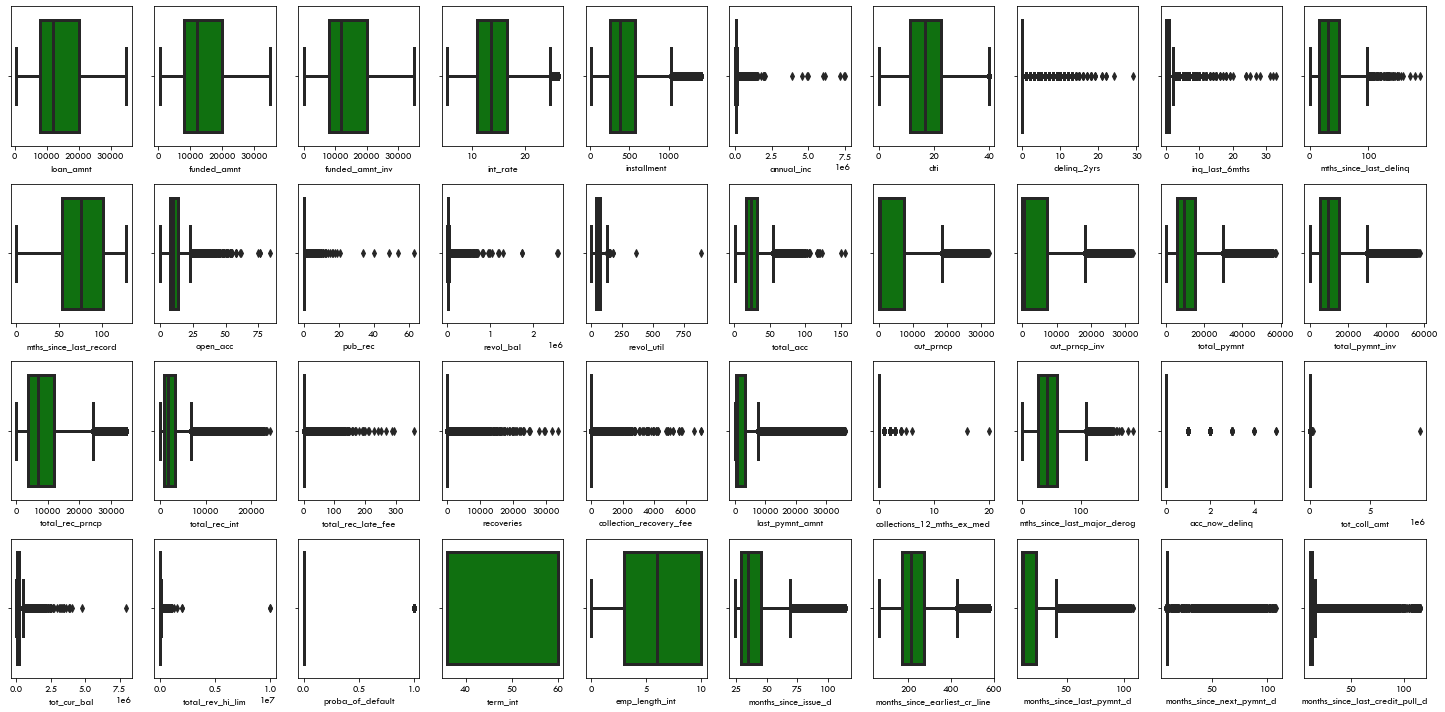

In [57]:
fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(20,10))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], color='g', ax=axs[i//10, i%10])
    
plt.tight_layout()
plt.show()

- Terdapat beberapa kolom dengan global outliers yang sangat jauh dari distribusinya.
- Kolom-kolom tersebut adalah `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim`
- Ketiga kolom tersebut akan direduksi outliersnya dengan metode manual dikarenakan banyak fitur yang memang isinya outliers (variansnya sangat tinggi) 

In [58]:
from scipy import stats

In [59]:
print('Before drop rows:', df.shape)

df.drop(df[df['tot_coll_amt'] > 9000000].index, inplace=True)
df.drop(df[df['tot_cur_bal'] > 7000000].index, inplace=True)
df.drop(df[df['total_rev_hi_lim'] > 9000000].index, inplace=True)

print('After drop rows:', df.shape)

Before drop rows: (465116, 58)
After drop rows: (465112, 58)


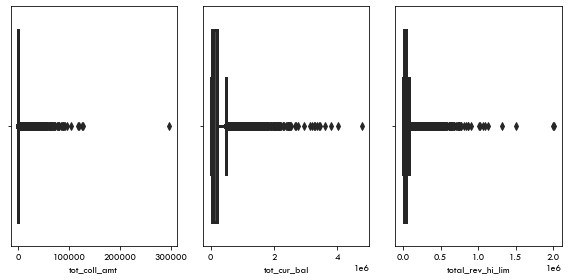

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
sns.boxplot(x='tot_coll_amt', data=df, color='g', ax=axs[0])
sns.boxplot(x='tot_cur_bal', data=df, color='g', ax=axs[1])
sns.boxplot(x='total_rev_hi_lim', data=df, color='g', ax=axs[2])
plt.tight_layout()
plt.show()

## Checking Invalid Values (Categorical Features)

In [61]:
cats = df.select_dtypes(include=['object']).columns.tolist()
print(cats)

['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']


In [62]:
print(f"Unique values by features\n")

for cats_unique in cats:
    unique_values = df[cats_unique].unique()
    print(f"{cats_unique}:\n {unique_values}\n")

Unique values by features

term:
 [' 36 months' ' 60 months']

grade:
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']

emp_title:
 [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length:
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership:
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status:
 ['Verified' 'Source Verified' 'Not Verified']

loan_status:
 ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

pymnt_plan:
 ['n' 'y']

purpose:
 ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

title:
 ['Computer' 'bike' 'real estate busines

## Drop Features 2

In [63]:
# Constant Features

df.drop(['application_type'], axis=1, inplace=True)
df.shape

(465112, 57)

# Exploratory Data Analysis - Insights

In [64]:
df_eda = df.copy()
df_eda.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d
56245,24375,24375,24375.0,36 months,11.99,809.49,B,Gift Planning,1 year,RENT,55000.0,Verified,Current,n,debt_consolidation,Credit Card Consolidation/Major Purchase,CA,15.77,0.0,0.0,NaN,NaN,10.0,0.0,16393,59.2,16.0,f,8392.76,8392.76,20237.03,20237.03,15982.24,4254.79,0.0,0.0,0.0,809.49,0.0,NaN,0.0,0.0,76034.0,27700.0,0,36,1.0,2013-12-01,36,2003-10-01,158.0,2016-01-01,11.0,2016-02-01,10.0,2016-01-01,11.0
11555,12000,10325,10075.0,60 months,11.99,229.63,B,University of California Berkeley,4 years,RENT,50000.0,Source Verified,Fully Paid,n,debt_consolidation,Credit Card consolidation,CA,6.79,0.0,0.0,NaN,NaN,11.0,0.0,5934,63.6,17.0,f,0.00,0.00,11746.80,11462.22,10325.00,1421.80,0.0,0.0,0.0,6641.50,0.0,NaN,0.0,NaN,NaN,NaN,0,60,4.0,2011-07-01,65,2000-12-01,192.0,2012-12-01,48.0,NaT,NaN,2016-01-01,11.0
80804,20000,20000,20000.0,36 months,12.99,673.79,B,Nurse,10+ years,MORTGAGE,76000.0,Source Verified,Fully Paid,n,major_purchase,home 1,WI,15.44,0.0,1.0,61.0,NaN,16.0,0.0,18439,41.3,45.0,w,0.00,0.00,23731.20,23731.20,20000.00,3731.20,0.0,0.0,0.0,8234.03,0.0,61.0,0.0,0.0,36162.0,44700.0,0,36,10.0,2013-10-01,38,2001-08-01,184.0,2015-10-01,14.0,NaT,NaN,2016-01-01,11.0


- Dikarenakan variabel terlalu banyak untuk dianalisis, sehingga untuk kali ini fitur `loan_amnt` akan menjadi fokus analisa.
- Hal ini bertujuan untuk melihat perubahan permohonan pinjaman dari tahun ke tahun dan pengaruhnya terhadap variabel lain.

## Timeseries Chart

In [65]:
df_datetime = df_eda.select_dtypes('datetime').columns.tolist()
print(df_datetime)

['date_issue_d', 'date_earliest_cr_line', 'date_last_pymnt_d', 'date_next_pymnt_d', 'date_last_credit_pull_d']


### Issue Date on Loan Amount

In [66]:
df_eda['year_issue_d'] = df_eda['date_issue_d'].dt.year
df_eda['month_issue_d'] = df_eda['date_issue_d'].dt.month

df_viz1 = df_eda.groupby(['year_issue_d', 'month_issue_d']).agg({'loan_amnt' : 'mean'}).reset_index()
df_viz1.columns = ['Year_Join', 'Month_Join', 'Average_Loan']
df_viz1

,Year_Join,Month_Join,Average_Loan
0,2007,6,3827.083333
1,2007,7,5528.968254
2,2007,8,6963.513514
3,2007,9,7036.792453
4,2007,10,7222.355769
5,2007,11,9005.803571
6,2007,12,11002.485380
7,2008,1,9593.442623
8,2008,2,9670.669935
9,2008,3,10332.000000


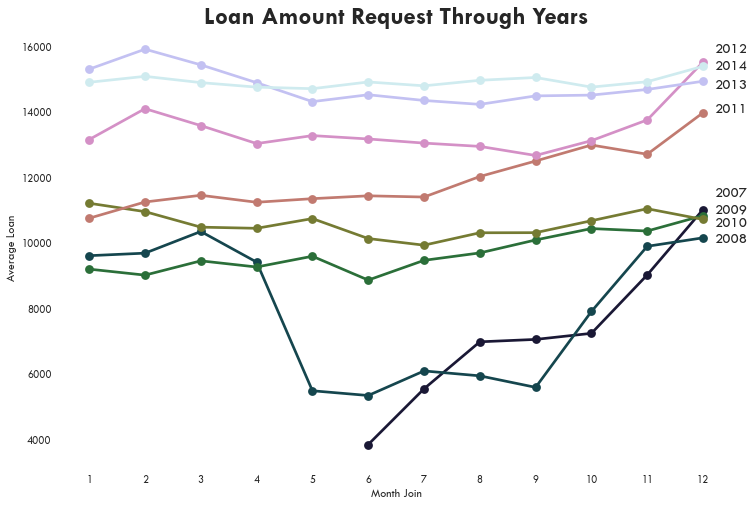

In [67]:
ax = sns.set(rc={'figure.figsize':(12,8)})
ax = sns.pointplot(x='Month_Join', y="Average_Loan", data=df_viz1, hue="Year_Join", palette="cubehelix")
ax.patch.set_facecolor('white')
ax.legend(title='Year_Join', loc='best')
ax.get_legend().remove() # hide this code if you wanna show the legend in the plot
plt.title("Loan Amount Request Through Years",fontsize=25, fontweight="bold", fontname='Tw Cen MT')
plt.xlabel('Month Join', fontname='Tw Cen MT')
plt.ylabel('Average Loan', fontname='Tw Cen MT')
plt.text(11.2, 15805,"2012",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 15275,"2014",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 14719,"2013",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 13985,"2011",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 11419,"2007",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10917,"2009",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10500,"2010",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10000,"2008",fontsize= 15, fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

## Scatter Plot

### Loan Amount vs Funded Amount

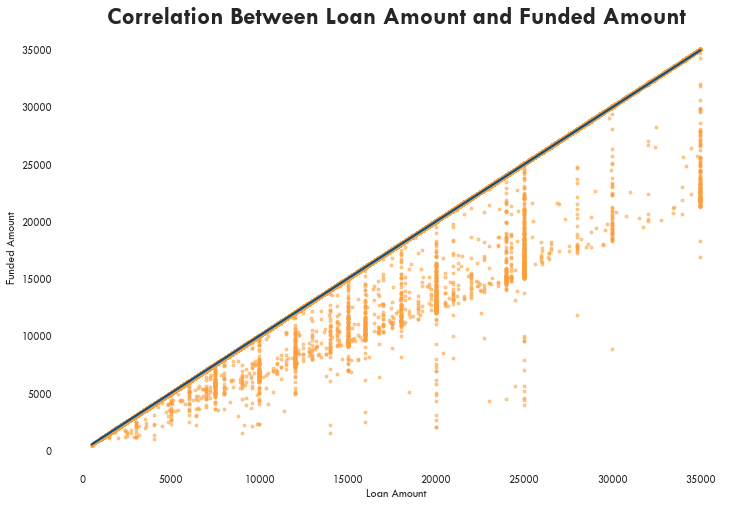

In [68]:
ax = sns.regplot(x='loan_amnt', y='funded_amnt', data=df_eda, marker=".", scatter_kws={'color':'#fc9f3c','alpha':0.5}, line_kws={'color':"#0d5388"})
ax.patch.set_facecolor('white')
plt.xlabel('Loan Amount', fontname='Tw Cen MT')
plt.ylabel('Funded Amount', fontname='Tw Cen MT')
plt.title('Correlation Between Loan Amount and Funded Amount', fontsize=25, fontweight="bold", fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

## Persona Plot

### Count Ratio Bad Loan & Good Loan

In [69]:
df_pp1 = df_eda.groupby(['proba_of_default']).agg({'loan_amnt':'count'}).reset_index()
df_pp1.columns = ['proba_of_default','total_user']
df_pp1['Ratio'] = round(df_pp1['total_user']/df_pp1['total_user'].sum()*100,0)
df_pp1

,proba_of_default,total_user,Ratio
0,0,414292,89.0
1,1,50820,11.0


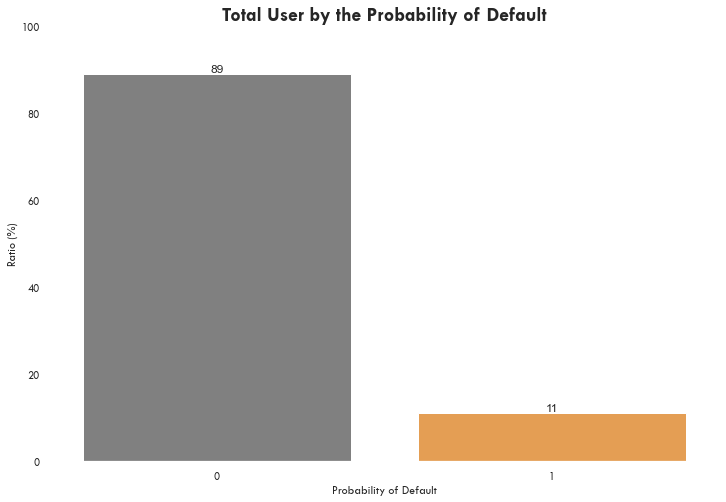

In [70]:
cols = ['#fc9f3c' if x == 11 else 'grey' for x in df_pp1['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp1,
            x='proba_of_default',
            y='Ratio',
            palette = cols)

plt.title('Total User by the Probability of Default', size=20, weight='bold', fontname='Tw Cen MT')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Probability of Default', fontname='Tw Cen MT')
plt.ylabel('Ratio (%)', fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.ylim(0,100)
plt.show()

### Count Ratio of Purpose

In [71]:
df_pp2 = df_eda.groupby(['purpose']).agg({'loan_amnt':'count'}).reset_index()
df_pp2.columns = ['purpose','total_user']
df_pp2['Ratio'] = round(df_pp2['total_user']/df_pp2['total_user'].sum()*100,1)
df_pp2 = df_pp2.sort_values(by =['Ratio'], ascending=False).reset_index()
df_pp2 = df_pp2.drop(columns=['index'])
df_pp2

,purpose,total_user,Ratio
0,debt_consolidation,273587,58.8
1,credit_card,103824,22.3
2,home_improvement,26460,5.7
3,other,23625,5.1
4,major_purchase,9807,2.1
5,small_business,6994,1.5
6,car,5380,1.2
7,medical,4586,1.0
8,moving,2987,0.6
9,house,2269,0.5


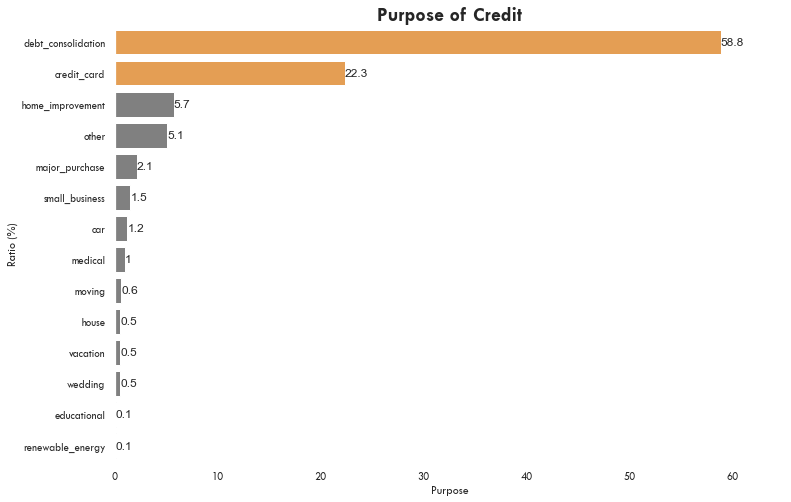

In [72]:
cols = ['#fc9f3c' if x >= 12 else 'grey' for x in df_pp2['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp2,
            x='Ratio',
            y='purpose',
            palette = cols)

plt.title('Purpose of Credit', size=20, weight='bold', fontname='Tw Cen MT')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Purpose', fontname='Tw Cen MT')
plt.ylabel('Ratio (%)', fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.xlim(0,65)
plt.show()

Personal loan purposes vs. Business loan purposes:
- Personal loan purposes: debt_consolidation, credit_card, home_improvement, major_purchase, car, medical, moving, house, vacation, wedding, other
- Business loan purposes: small_business, educational, renewable_energy

In [73]:
df_eda['purpose_sum'] = np.where(df_eda['purpose']=='small_business', 'business loan',
                           np.where(df_eda['purpose']=='educational', 'business loan',
                                np.where(df_eda['purpose']=='renewable_energy', 'business loan','personal loan')))
df_eda.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d,year_issue_d,month_issue_d,purpose_sum
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,1985-01-01,383.0,2015-01-01,23.0,NaT,NaN,2016-01-01,11.0,2011,12,personal loan
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,NaN,0.0,NaN,NaN,NaN,1,60,0.0,2011-12-01,60,1999-04-01,212.0,2013-04-01,44.0,NaT,NaN,2013-09-01,39.0,2011,12,personal loan
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,2001-11-01,181.0,2014-06-01,30.0,NaT,NaN,2016-01-01,11.0,2011,12,business loan


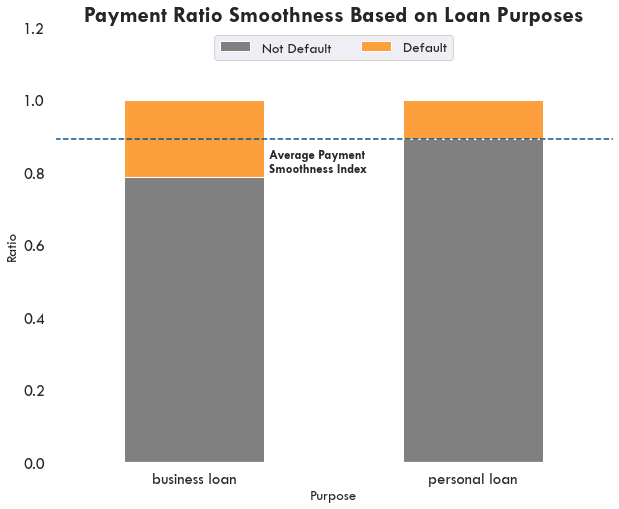

In [82]:
font = fm.FontProperties(family='Tw Cen MT', size=15)

df_pp3 = df_eda[['purpose_sum','proba_of_default']]
df_pp3['proba_of_default'] = np.where(df_pp3['proba_of_default']==1,'Default','Not Default')

cross_tab_prop = pd.crosstab(index=df_pp3['purpose_sum'],
                             columns=df_pp3['proba_of_default'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['Not Default','Default']]


ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Grey','#fc9f3c'],
                    figsize=(10, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Loan Purposes",fontsize=23,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop['Not Default'].mean()-0.04,s='Average Payment \nSmoothness Index',fontsize=13,weight='bold', fontname='Tw Cen MT')
plt.xlabel("Purpose",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks(fontname='Tw Cen MT')
plt.show() 

### Count Ratio of Initial List Status

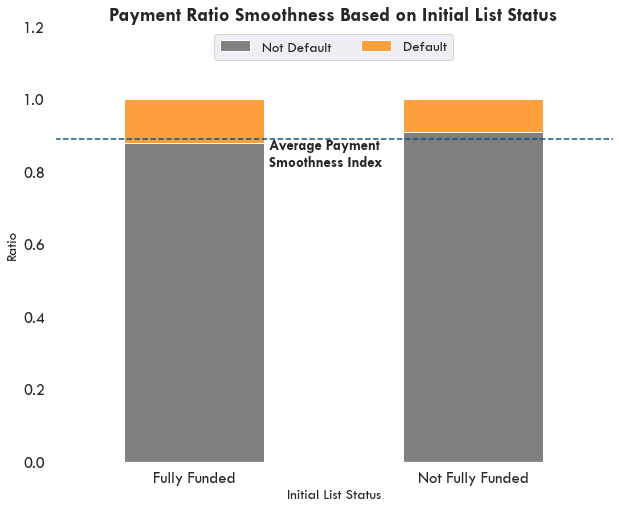

In [81]:
df_pp5 = df_eda[['initial_list_status','proba_of_default']]
df_pp5['proba_of_default'] = np.where(df_pp5['proba_of_default']==1,'Default','Not Default')
df_pp5['initial_list_status'] = np.where(df_pp5['initial_list_status']=='f','Fully Funded','Not Fully Funded')

cross_tab_prop2 = pd.crosstab(index=df_pp5['initial_list_status'],
                             columns=df_pp5['proba_of_default'],
                             normalize="index")
cross_tab_prop2 = cross_tab_prop2[['Not Default','Default']]


ax = cross_tab_prop2.plot(kind='bar', 
                    stacked=True, 
                    color=['Grey','#fc9f3c'],
                    figsize=(10, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Initial List Status",fontsize=20,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop2['Not Default'].mean()-0.08,s='Average Payment \nSmoothness Index',fontsize=15,weight='bold', fontname='Tw Cen MT')
plt.xlabel("Initial List Status",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show() 

### Interest Rate Ratio

In [76]:
df_eda['int_rate_group'] = np.where(df_eda['int_rate']<11, '5%-10%',
                                 np.where(df_eda['int_rate']<15, '10%-14%',
                                          np.where(df_eda['int_rate']<19, '14%-18%',
                                                   np.where(df_eda['int_rate']<23, '18%-22%','22%-26%'))))

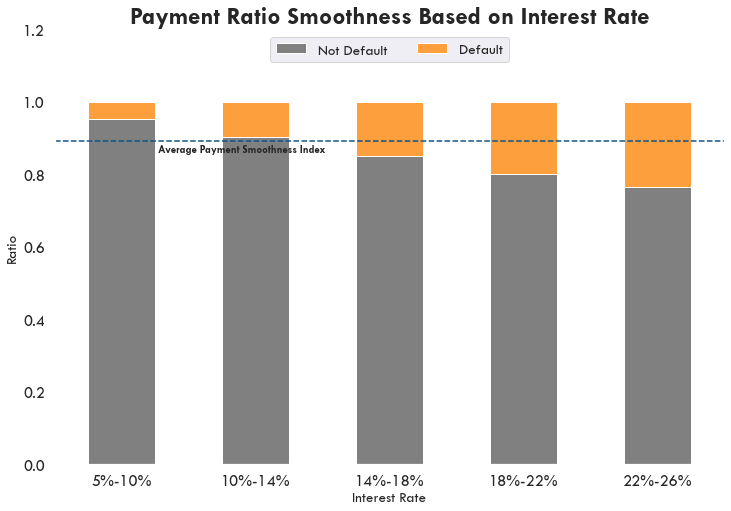

In [80]:
df_pp6 = df_eda[['int_rate_group','proba_of_default']]
df_pp6['proba_of_default'] = np.where(df_pp6['proba_of_default']==1,'Default','Not Default')

cross_tab_prop3 = pd.crosstab(index=df_pp6['int_rate_group'],
                             columns=df_pp6['proba_of_default'],
                             normalize="index")
cross_tab_prop3 = cross_tab_prop3[['Not Default','Default']]

#Agar Kolom Kategorikal terurut
cross_tab_prop3['sort_bin'] = np.where(cross_tab_prop3.index=='5%-10%',1,
                                       np.where(cross_tab_prop3.index=='10%-14%',2,
                                                np.where(cross_tab_prop3.index=='14%-18%',3,
                                                         np.where(cross_tab_prop3.index=='18%-22%',4,5))))
                                     
cross_tab_prop3 = cross_tab_prop3.sort_values(by='sort_bin', ascending=True)
cross_tab_prop3 = cross_tab_prop3.drop('sort_bin', axis=1)
cross_tab_prop3

ax = cross_tab_prop3.plot(kind='bar',
                          stacked=True,
                          color=['Grey','#fc9f3c'],
                          figsize=(12, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
sns.set(font_scale=1.5)
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Interest Rate",fontsize=25,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop['Not Default'].mean()+0.02,s='Average Payment Smoothness Index',fontsize=11,weight='bold',fontname='Tw Cen MT')
plt.xlabel("Interest Rate",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

# Exploratory Data Analysis - Redundant Features

## Drop Features 3

In [76]:
# Drop after EDA - Insights

cols_to_drop2 = ['loan_status', 
                 'term', 
                 'emp_length', 
                 'date_issue_d', 
                 'date_earliest_cr_line', 
                 'date_last_pymnt_d', 
                 'date_next_pymnt_d', 
                 'date_last_credit_pull_d']
df.drop(cols_to_drop2, axis=1, inplace=True)

### Numerical Features (Drop High Correlation)

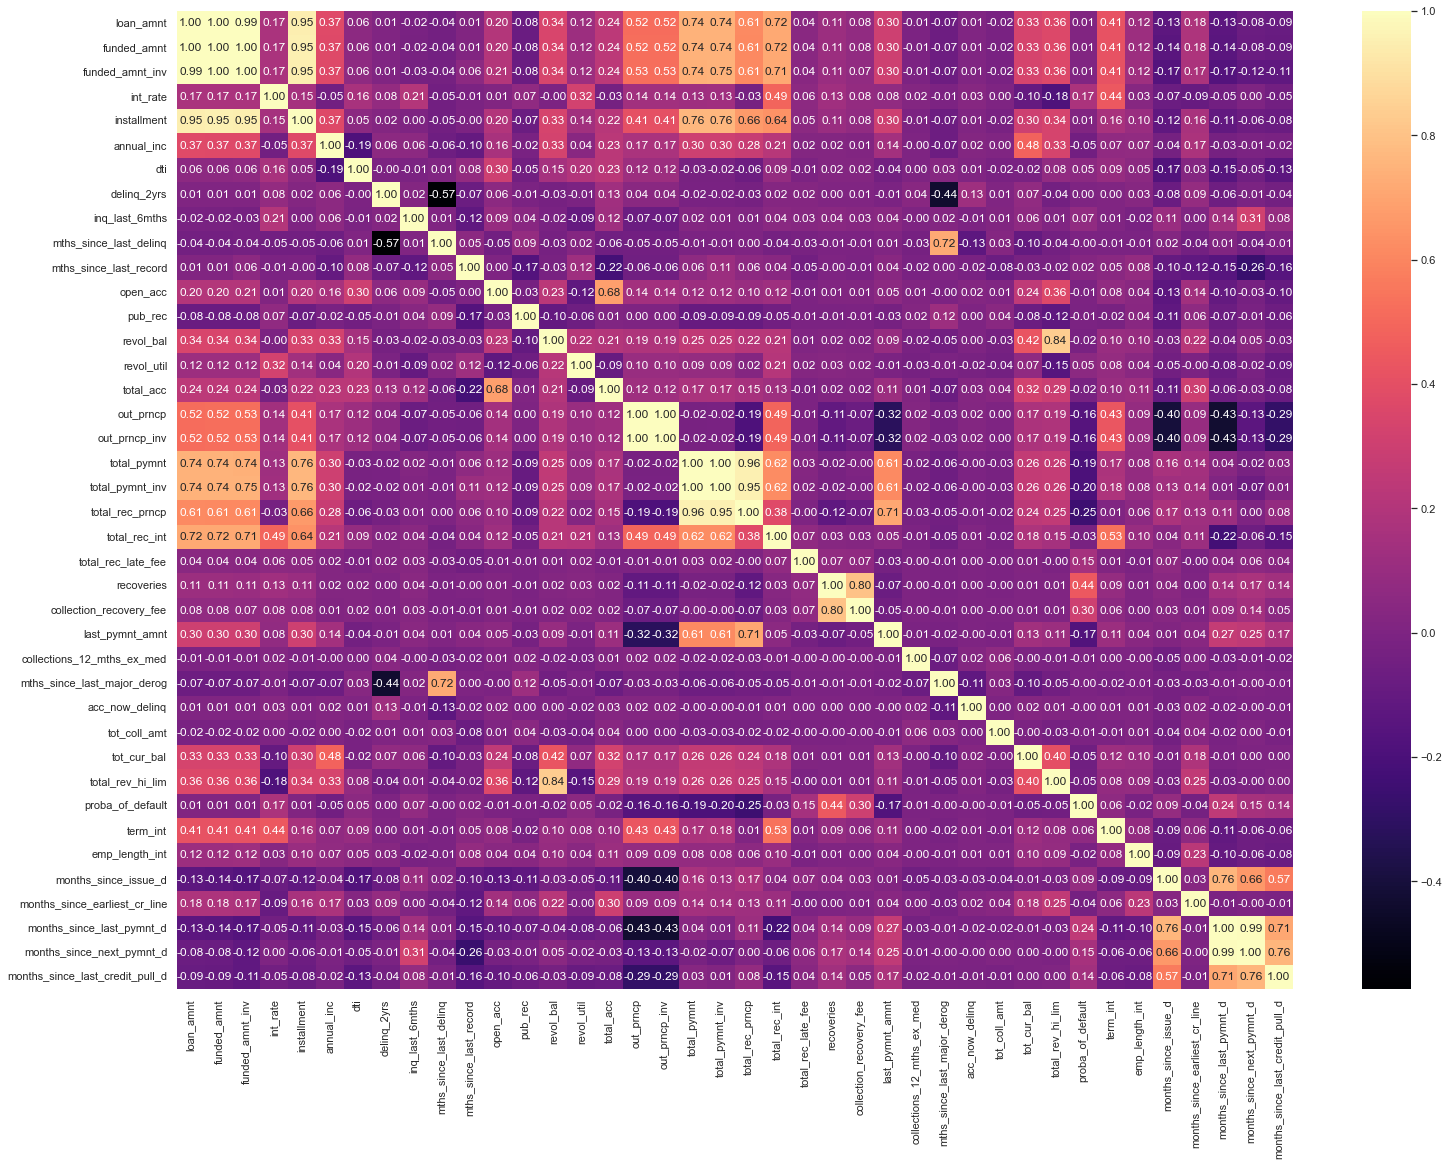

(465112, 49)

In [77]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()
display(df.shape)

- Hasil heatmap korelasi menunjukkan terdapat banyak fitur yang redundan.
- Oleh sebab itu, fitur yang memiliki korelasi > 0.7 akan dihapus salah satunya agar menghindari multikolinieritas.
- Nilai batas korelasi 0.7 memberikan trade-off yang baik antara menghilangkan fitur yang redundan dan mempertahankan fitur yang berbeda-beda namun masih berkaitan satu sama lain. Nilai korelasi di bawah 0.7 umumnya dianggap sebagai korelasi yang lemah atau tidak signifikan, sementara nilai di atas 0.7 dianggap sebagai korelasi yang kuat dan mengandung informasi yang redundan. Oleh karena itu, nilai batas korelasi 0.7 sering dianggap sebagai batas yang tepat untuk mempertimbangkan kedua hal ini.

In [78]:
# Compute the absolute correlation matrix
corr_matrix = np.abs(df.corr())

# Select upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper_triangle = corr_matrix.where(mask)

# Find columns with correlation greater than 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any (upper_triangle[col].gt(0.7))]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d']

In [79]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
df.shape

(465112, 34)

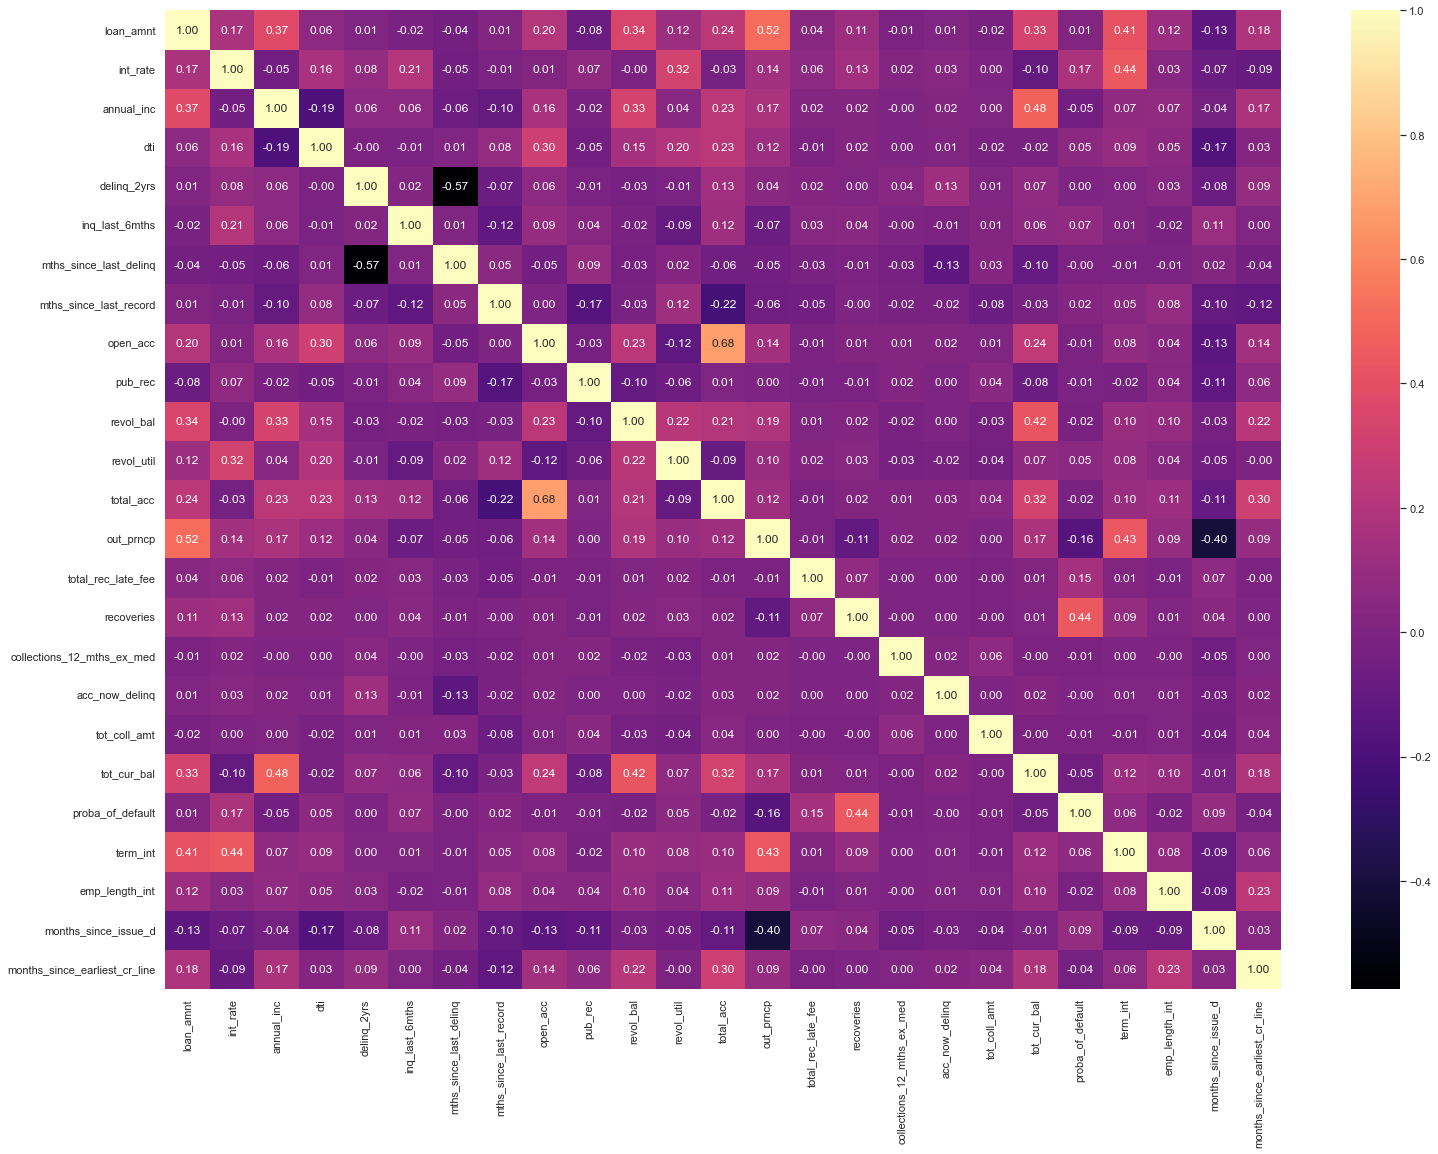

In [80]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

### Categorical Features (Drop High Cradinality)

In [81]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

emp_title              205222
title                   62980
addr_state                 50
purpose                    14
grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
initial_list_status         2
dtype: int64

- High cardinality (kardinalitas tinggi) adalah istilah yang digunakan dalam analisis data untuk menggambarkan sebuah kolom atau fitur yang memiliki banyak nilai unik atau kategori yang berbeda.
- Dari fitur-fitur di atas, fitur yang akan di drop adalah `emp_title` dan `title`.
- Hal ini bertujuan untuk meningkatkan kinerja algoritma dan harapannya dapan menurunkan resiko overfitting.

In [82]:
df.drop(['emp_title', 'title', 'addr_state'], axis=1, inplace=True)
df.shape

(465112, 31)

### Categorical Featurs (Drop Imbalance Class)

In [83]:
new_cats = df.select_dtypes(include=['object']).columns.tolist()
print(new_cats)

['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']


In [84]:
print(f"Check Imbalance class by categorical features\n")

for imb_cats in new_cats:
    count_values = df[imb_cats].value_counts(normalize=True)*100
    print(f"{imb_cats}:\n{count_values}\n")

Check Imbalance class by categorical features

grade:
B    29.358520
C    26.872022
D    16.497102
A    16.045383
E     7.672776
F     2.840821
G     0.713377
Name: grade, dtype: float64

home_ownership:
MORTGAGE    50.569970
RENT        40.453697
OWN          8.926452
OTHER        0.038915
NONE         0.010750
ANY          0.000215
Name: home_ownership, dtype: float64

verification_status:
Verified           35.998856
Source Verified    32.174616
Not Verified       31.826528
Name: verification_status, dtype: float64

pymnt_plan:
n    99.998065
y     0.001935
Name: pymnt_plan, dtype: float64

purpose:
debt_consolidation    58.821746
credit_card           22.322365
home_improvement       5.688952
other                  5.079422
major_purchase         2.108524
small_business         1.503724
car                    1.156711
medical                0.985999
moving                 0.642211
vacation               0.532775
wedding                0.503750
house                  0.487839
educat

In [85]:
df.drop('pymnt_plan', axis=1, inplace=True)

# ** Final Feature Extraction

In [86]:
df['purpose'] = np.where(df['purpose']=='small_business', 'business loan',
                           np.where(df['purpose']=='educational', 'business loan',
                                np.where(df['purpose']=='renewable_energy', 'business loan','personal loan')))
df.head(3)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,proba_of_default,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line
0,5000,10.65,B,RENT,24000.0,Verified,personal loan,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0,36,10.0,60,383.0
1,2500,15.27,C,RENT,30000.0,Source Verified,personal loan,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,117.08,0.0,0.0,NaN,NaN,1,60,0.0,60,212.0
2,2400,15.96,C,RENT,12252.0,Not Verified,business loan,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0,36,10.0,60,181.0


In [87]:
df['home_ownership'] = np.where(df['home_ownership'].isin(['ANY', 'OTHER']), 'OTHER', df['home_ownership'])
df['home_ownership'].value_counts()

MORTGAGE    235207
RENT        188155
OWN          41518
OTHER          182
NONE            50
Name: home_ownership, dtype: int64

# Handling Missing Values

## Dropping Columns with more than 20% Missing Values
- Menghapus kolom yang memiliki lebih dari 20% nilai yang hilang adalah praktik umum dalam pre-processing data karena kolom-kolom ini umumnya tidak memberikan cukup informasi yang berguna untuk analisis atau pemodelan. Ketika suatu kolom memiliki persentase nilai yang hilang yang tinggi, itu dapat memperkenalkan bias atau noise ke dalam proses analisis atau pemodelan.

In [88]:
df.isna().sum().sort_values(ascending=False) * 100 / df.shape[0]

mths_since_last_record           86.594842
mths_since_last_delinq           53.713299
tot_cur_bal                      15.081099
tot_coll_amt                     15.081099
emp_length_int                    4.424311
revol_util                        0.073101
collections_12_mths_ex_med        0.031175
acc_now_delinq                    0.006235
total_acc                         0.006235
pub_rec                           0.006235
open_acc                          0.006235
months_since_earliest_cr_line     0.006235
inq_last_6mths                    0.006235
delinq_2yrs                       0.006235
annual_inc                        0.000860
months_since_issue_d              0.000000
grade                             0.000000
term_int                          0.000000
proba_of_default                  0.000000
home_ownership                    0.000000
verification_status               0.000000
purpose                           0.000000
recoveries                        0.000000
total_rec_l

In [89]:
df.drop(['mths_since_last_record','mths_since_last_delinq'] , axis=1, inplace=True)

## Filling Missing Values (Step by Step)
- Missing values pada fitur-fitur akan diisi dengan nilai mediannya.
- Hal ini dipilih karena pada pre-processing nanti akan dilakukan random undersampling menjadi sekitar 90 ribu data. apabila diisi 0 atau -1 (data diluar distribusi) sangat disayangkan bagi persebaran data yang optimal.

In [90]:
display(df['tot_cur_bal'].describe())
print('Total Null:',df['tot_cur_bal'].isna().sum())

count    3.949680e+05
mean     1.387374e+05
std      1.512793e+05
min      0.000000e+00
25%      2.863500e+04
50%      8.155300e+04
75%      2.089240e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64

Total Null: 70144


In [91]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)

In [92]:
display(df['tot_coll_amt'].describe())
print('Total Null:',df['tot_coll_amt'].isna().sum())

count    394968.000000
mean        168.288882
std        1583.410877
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      296368.000000
Name: tot_coll_amt, dtype: float64

Total Null: 70144


In [93]:
df['tot_coll_amt'].fillna(0, inplace=True)

In [94]:
display(df['emp_length_int'].describe())
print('Total Null:',df['emp_length_int'].isna().sum())

count    444534.000000
mean          5.992073
std           3.626966
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

Total Null: 20578


In [95]:
df['emp_length_int'].fillna(df['emp_length_int'].median(), inplace=True)

In [96]:
display(df['revol_util'].describe())
print('Total Null:',df['revol_util'].isna().sum())

count    464772.000000
mean         56.188080
std          23.730662
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

Total Null: 340


In [97]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [98]:
display(df['collections_12_mths_ex_med'].describe())
print('Total Null:',df['collections_12_mths_ex_med'].isna().sum())

count    464967.000000
mean          0.009093
std           0.108716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

Total Null: 145


In [99]:
df['collections_12_mths_ex_med'].fillna(0, inplace=True)

In [100]:
display(df['months_since_earliest_cr_line'].describe())
print('Total Null:',df['months_since_earliest_cr_line'].isna().sum())

count    465083.000000
mean        229.518617
std          84.822698
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

Total Null: 29


In [101]:
df['months_since_earliest_cr_line'].fillna(df['months_since_earliest_cr_line'].median(), inplace=True)

In [102]:
display(df['total_acc'].describe())
print('Total Null:',df['total_acc'].isna().sum())

count    465083.000000
mean         25.056635
std          11.599590
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

Total Null: 29


In [103]:
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [104]:
display(df['acc_now_delinq'].describe())
print('Total Null:',df['acc_now_delinq'].isna().sum())

count    465083.000000
mean          0.003993
std           0.068583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

Total Null: 29


In [105]:
df['acc_now_delinq'].fillna(0, inplace=True)

In [106]:
display(df['pub_rec'].describe())
print('Total Null:',df['pub_rec'].isna().sum())

count    465083.000000
mean          0.160113
std           0.509222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

Total Null: 29


In [107]:
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [108]:
display(df['open_acc'].describe())
print('Total Null:',df['open_acc'].isna().sum())

count    465083.000000
mean         11.185963
std           4.987710
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

Total Null: 29


In [109]:
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [110]:
display(df['inq_last_6mths'].describe())
print('Total Null:',df['inq_last_6mths'].isna().sum())

count    465083.000000
mean          0.804736
std           1.091566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

Total Null: 29


In [111]:
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [112]:
display(df['delinq_2yrs'].describe())
print('Total Null:',df['delinq_2yrs'].isna().sum())

count    465083.000000
mean          0.284375
std           0.796834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

Total Null: 29


In [113]:
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace=True)

In [114]:
display(df['annual_inc'].describe())
print('Total Null:',df['annual_inc'].isna().sum())

count    4.651080e+05
mean     7.324893e+04
std      5.442542e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.882025e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

Total Null: 4


In [115]:
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [116]:
display(df.head())
print(df.shape)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,proba_of_default,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line
0,5000,10.65,B,RENT,24000.0,Verified,personal loan,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.00,0.00,0.0,0.0,0.0,81553.0,0,36,10.0,60,383.0
1,2500,15.27,C,RENT,30000.0,Source Verified,personal loan,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.00,117.08,0.0,0.0,0.0,81553.0,1,60,0.0,60,212.0
2,2400,15.96,C,RENT,12252.0,Not Verified,business loan,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.00,0.00,0.0,0.0,0.0,81553.0,0,36,10.0,60,181.0
3,10000,13.49,C,RENT,49200.0,Source Verified,personal loan,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,16.97,0.00,0.0,0.0,0.0,81553.0,0,36,10.0,60,250.0
4,3000,12.69,B,RENT,80000.0,Source Verified,personal loan,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,0.00,0.00,0.0,0.0,0.0,81553.0,0,60,1.0,60,251.0


(465112, 28)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      465112 non-null  int64  
 1   int_rate                       465112 non-null  float64
 2   grade                          465112 non-null  object 
 3   home_ownership                 465112 non-null  object 
 4   annual_inc                     465112 non-null  float64
 5   verification_status            465112 non-null  object 
 6   purpose                        465112 non-null  object 
 7   dti                            465112 non-null  float64
 8   delinq_2yrs                    465112 non-null  float64
 9   inq_last_6mths                 465112 non-null  float64
 10  open_acc                       465112 non-null  float64
 11  pub_rec                        465112 non-null  float64
 12  revol_bal                     

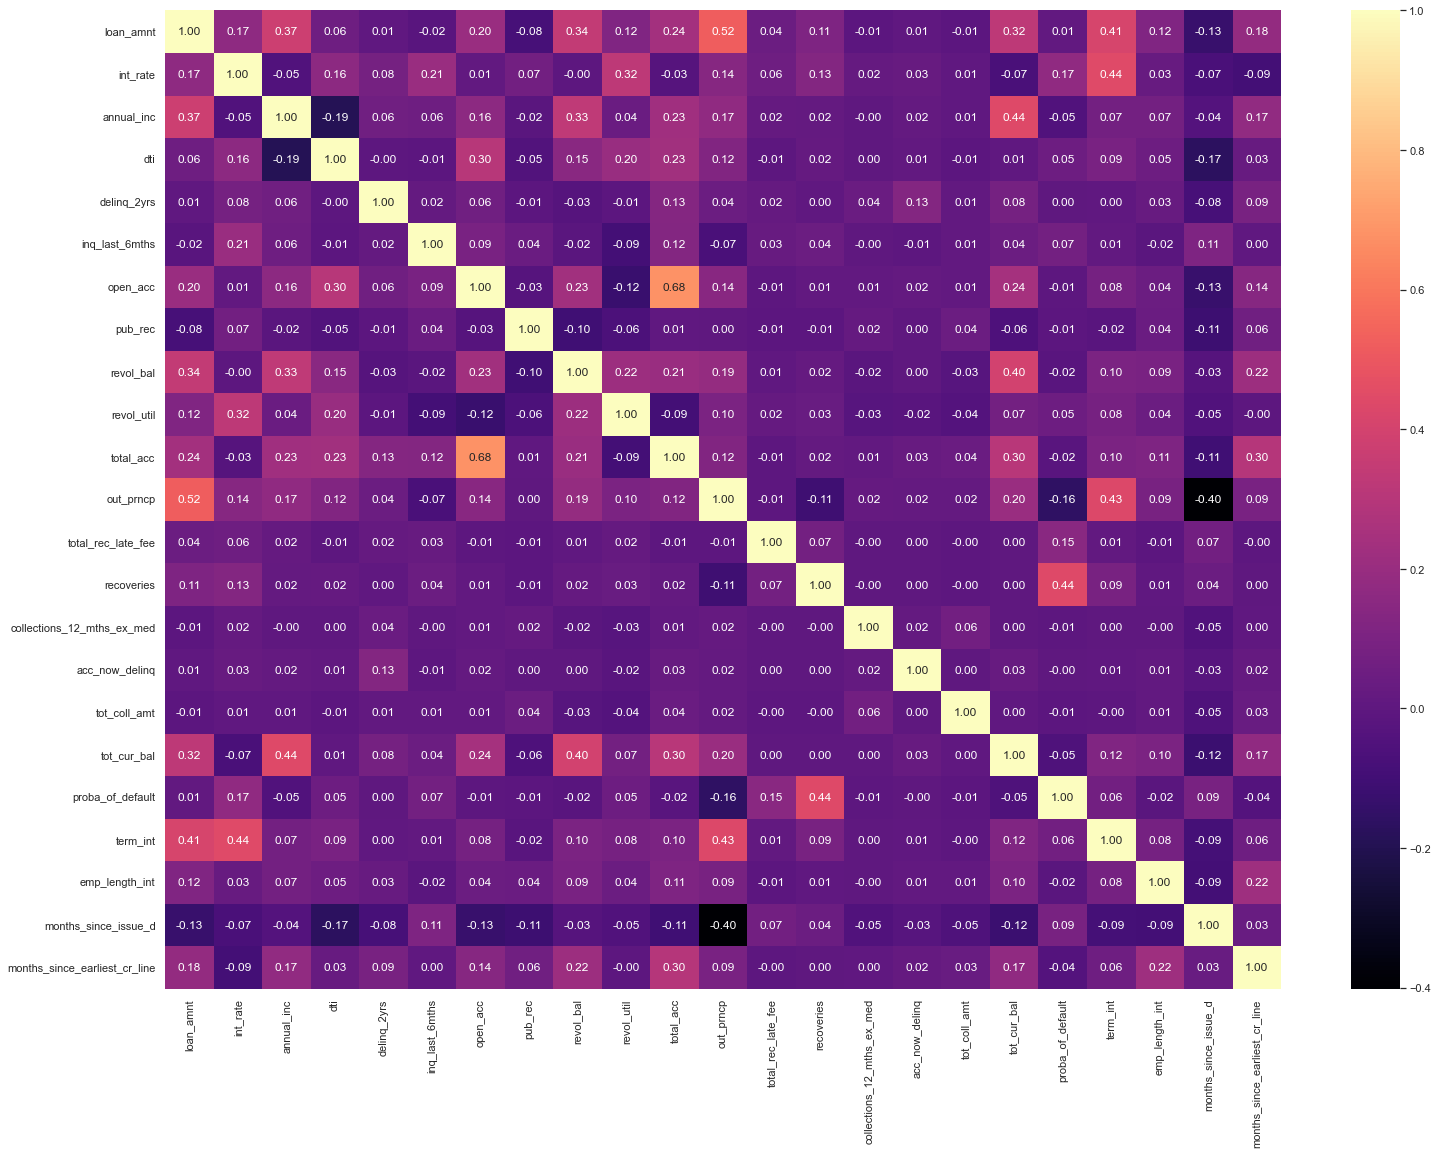

In [118]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

# ** Alternate Drop Feature 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      465112 non-null  int64  
 1   int_rate                       465112 non-null  float64
 2   grade                          465112 non-null  object 
 3   home_ownership                 465112 non-null  object 
 4   annual_inc                     465112 non-null  float64
 5   verification_status            465112 non-null  object 
 6   purpose                        465112 non-null  object 
 7   dti                            465112 non-null  float64
 8   delinq_2yrs                    465112 non-null  float64
 9   inq_last_6mths                 465112 non-null  float64
 10  open_acc                       465112 non-null  float64
 11  pub_rec                        465112 non-null  float64
 12  revol_bal                     

In [120]:
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'proba_of_default', 'term_int',
       'emp_length_int', 'months_since_issue_d',
       'months_since_earliest_cr_line'],
      dtype='object')

In [121]:
df.drop(['months_since_earliest_cr_line', 'emp_length_int',
         'open_acc', 'revol_bal',
         'delinq_2yrs', 'collections_12_mths_ex_med', 'inq_last_6mths', 
         'tot_coll_amt','acc_now_delinq', #saran chatGPT
         'initial_list_status', 'verification_status','grade'], axis=1, inplace=True) #tadinya home owner dan grade bisa dpt di atas 90 utk xgb

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             465112 non-null  int64  
 1   int_rate              465112 non-null  float64
 2   home_ownership        465112 non-null  object 
 3   annual_inc            465112 non-null  float64
 4   purpose               465112 non-null  object 
 5   dti                   465112 non-null  float64
 6   pub_rec               465112 non-null  float64
 7   revol_util            465112 non-null  float64
 8   total_acc             465112 non-null  float64
 9   out_prncp             465112 non-null  float64
 10  total_rec_late_fee    465112 non-null  float64
 11  recoveries            465112 non-null  float64
 12  tot_cur_bal           465112 non-null  float64
 13  proba_of_default      465112 non-null  int32  
 14  term_int              465112 non-null  int32  
 15  

# Split Dataset

In [123]:
from sklearn.model_selection import train_test_split

X = df.drop('proba_of_default', axis=1)
y = df['proba_of_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [124]:
X_train.shape

(325578, 15)

In [125]:
y_train.shape

(325578,)

In [126]:
X_test.shape

(139534, 15)

In [127]:
y_test.shape

(139534,)

In [128]:
y_test.value_counts()

0    124177
1     15357
Name: proba_of_default, dtype: int64

# Feature Encoding & Standardization

In [129]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns

## OneHot Encoding and Standard Scaler

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# define a pipeline for one-hot encoding the categorical features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
ohe_pipe = Pipeline([('onehot_encoder', onehot_encoder)])

# define a pipeline for standardization for the numerical features
scaler = StandardScaler()
std_pipe = Pipeline([('scaler', scaler)])

# define a preprocessor that applies the one-hot encoding pipeline to the categorical features
preprocessor = ColumnTransformer([
    ('std_pipe', std_pipe, numerical_features),
    ('ohe_pipe', ohe_pipe, categorical_features)])

In [131]:
# fit and transform the train data
X_train_processed = preprocessor.fit_transform(X_train)

# transform the test data
X_test_processed = preprocessor.transform(X_test)

In [132]:
# get the feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['ohe_pipe'].named_steps['onehot_encoder'].get_feature_names_out(categorical_features)

# combine the feature names of numerical and one-hot encoded categorical features
feature_names = list(numerical_features) + list(ohe_feature_names)

# create a new DataFrame with preprocessed data and feature names
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

In [133]:
X_train_processed.head(3)

,loan_amnt,int_rate,annual_inc,dti,pub_rec,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,tot_cur_bal,term_int,months_since_issue_d,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_personal loan
0,0.707725,0.151468,-0.491625,1.861028,-0.313993,0.333134,-0.437468,1.151622,-0.122067,-0.153906,-0.735957,-0.616024,-0.715974,0.0,0.0,1.0,0.0,1.0
1,-0.777451,-0.523348,-0.887872,-0.180480,1.649536,0.333134,-0.696390,-0.693904,-0.122067,-0.153906,-0.187209,-0.616024,0.050453,0.0,0.0,0.0,0.0,1.0
2,0.442622,-1.131601,0.120758,-0.408447,-0.313993,-0.942648,1.979138,-0.693904,-0.122067,-0.153906,0.070337,1.623313,0.538180,0.0,0.0,0.0,0.0,1.0


In [134]:
X_train_processed.describe()

,loan_amnt,int_rate,annual_inc,dti,pub_rec,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,tot_cur_bal,term_int,months_since_issue_d,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_personal loan
count,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,3.255780e+05,325578.000000,325578.000000,325578.000000,325578.000000,325578.000000
mean,-2.036388e-16,-9.107670e-16,3.135797e-16,2.773795e-16,-3.560926e-15,-3.198927e-17,3.629161e-16,-1.823786e-15,-5.513081e-15,-8.671380e-16,-5.664003e-16,1.531566e-15,-1.955460e-16,0.000114,0.000350,0.089118,0.404106,0.982990
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.010660,0.018709,0.284915,0.490719,0.129308
min,-1.666146e+00,-1.930364e+00,-1.285993e+00,-2.192697e+00,-3.139928e-01,-2.365796e+00,-2.077307e+00,-6.939037e-01,-1.220673e-01,-1.539059e-01,-9.267262e-01,-6.160243e-01,-1.064350e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.623880e-01,-6.518849e-01,-5.096360e-01,-7.459389e-01,-3.139928e-01,-7.110702e-01,-6.963897e-01,-6.939037e-01,-1.220673e-01,-1.539059e-01,-6.867696e-01,-6.160243e-01,-7.159737e-01,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.803839e-01,-3.904134e-02,-1.854335e-01,-4.548367e-02,-3.139928e-01,5.945115e-02,-1.785456e-01,-6.237205e-01,-1.220673e-01,-1.539059e-01,-3.460815e-01,-6.160243e-01,-2.979226e-01,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.836243e-01,6.105269e-01,2.828589e-01,7.097344e-01,-3.139928e-01,7.836570e-01,5.982206e-01,4.629739e-01,-1.220673e-01,-1.539059e-01,3.896033e-01,1.623313e+00,3.988292e-01,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.491140e+00,2.807124e+00,1.337642e+02,2.900249e+00,1.233883e+02,3.520449e+01,1.078249e+01,4.361629e+00,6.762896e+01,6.076926e+01,2.774066e+01,1.623313e+00,5.206416e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
X_test_processed.head(3)

,loan_amnt,int_rate,annual_inc,dti,pub_rec,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,tot_cur_bal,term_int,months_since_issue_d,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_personal loan
0,-1.304643,0.564621,-0.329524,-1.136920,3.613064,-2.121588,-0.696390,-0.693904,-0.122067,-0.153906,-0.840056,-0.616024,-0.924999,0.0,0.0,0.0,1.0,1.0
1,2.491140,2.169032,10.387170,-0.673346,11.467177,1.069971,1.116065,2.830011,-0.122067,-0.153906,13.626175,1.623313,0.120128,0.0,0.0,0.0,0.0,1.0
2,0.804125,-1.425399,0.841208,0.379884,-0.313993,-1.056331,-0.178546,-0.693904,-0.122067,-0.153906,1.169164,-0.616024,0.747205,0.0,0.0,0.0,0.0,1.0


In [136]:
X_test_processed.describe()

,loan_amnt,int_rate,annual_inc,dti,pub_rec,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,tot_cur_bal,term_int,months_since_issue_d,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_personal loan
count,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000,139534.000000
mean,-0.004550,0.000969,-0.002797,0.000423,0.001249,0.000152,-0.003513,-0.003045,0.002090,0.003903,-0.001130,0.001288,-0.003899,0.000093,0.000487,0.089605,0.405543,0.984033
std,0.994427,1.000873,0.932594,0.999312,0.999478,0.996046,1.003657,0.996129,0.977848,1.011039,1.010583,1.000651,0.997700,0.009652,0.022070,0.285617,0.490999,0.125350
min,-1.666146,-1.930364,-1.257103,-2.192697,-0.313993,-2.365796,-2.077307,-0.693904,-0.122067,-0.153906,-0.926726,-0.616024,-1.064350,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.762388,-0.651885,-0.509636,-0.744665,-0.313993,-0.711070,-0.696390,-0.693904,-0.122067,-0.153906,-0.688496,-0.616024,-0.715974,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.280384,-0.039041,-0.185434,-0.041663,-0.313993,0.059451,-0.178546,-0.629400,-0.122067,-0.153906,-0.346081,-0.616024,-0.297923,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.683624,0.610527,0.273799,0.705914,-0.313993,0.775236,0.598221,0.454952,-0.122067,-0.153906,0.390077,1.623313,0.398829,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.491140,2.807124,106.747352,2.900249,105.716538,4.063636,11.300333,4.320504,47.629295,53.686603,33.053087,1.623313,5.206416,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(325578, 18)
(139534, 18)


# Undersampling
- `RandomUnderSampler` dilakukan karena pc saya tidak kuat untuk mengoperasikan jenis under sampler lain (Tomek Link atau ENN) maupun oversampling untuk data yang jumlahnya amat banyak seperti dataset credit risk ini.

In [138]:
# before undersampling
print(pd.Series(y_train).value_counts())

0    290115
1     35463
Name: proba_of_default, dtype: int64


In [139]:
# after undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=69)
X_undersampling, y_undersampling = rus.fit_resample(X_train_processed, y_train)

print(pd.Series(y_undersampling).value_counts())

0    35463
1    35463
Name: proba_of_default, dtype: int64


In [140]:
X_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70926 entries, 0 to 70925
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              70926 non-null  float64
 1   int_rate               70926 non-null  float64
 2   annual_inc             70926 non-null  float64
 3   dti                    70926 non-null  float64
 4   pub_rec                70926 non-null  float64
 5   revol_util             70926 non-null  float64
 6   total_acc              70926 non-null  float64
 7   out_prncp              70926 non-null  float64
 8   total_rec_late_fee     70926 non-null  float64
 9   recoveries             70926 non-null  float64
 10  tot_cur_bal            70926 non-null  float64
 11  term_int               70926 non-null  float64
 12  months_since_issue_d   70926 non-null  float64
 13  home_ownership_NONE    70926 non-null  float64
 14  home_ownership_OTHER   70926 non-null  float64
 15  ho

# Modelling

## Function

In [141]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

def evaluate_model(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)
    
    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

## Run the Model

### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_undersampling, y_undersampling)

LogisticRegression()

In [143]:
evaluate_model(model_lr)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.850279
AUC Score Test proba: 0.85304

Others Metrics Evaluation:
Test Accuracy Score : 0.8724
Precision Score Test: 0.4458
Recall Score Test : 0.656
F1 Score Test : 0.5309

**CONFUSION MATRIX**
[[111655  12522]
 [  5283  10074]]


### Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=69)
model_dtree.fit(X_undersampling, y_undersampling)

DecisionTreeClassifier(random_state=69)

In [145]:
evaluate_model(model_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.749566

Others Metrics Evaluation:
Test Accuracy Score : 0.7469
Precision Score Test: 0.2684
Recall Score Test : 0.7529
F1 Score Test : 0.3957

**CONFUSION MATRIX**
[[92659 31518]
 [ 3794 11563]]


### Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=69)
model_rforest.fit(X_undersampling, y_undersampling)

RandomForestClassifier(random_state=69)

In [147]:
evaluate_model(model_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.885238

Others Metrics Evaluation:
Test Accuracy Score : 0.8597
Precision Score Test: 0.4207
Recall Score Test : 0.7287
F1 Score Test : 0.5334

**CONFUSION MATRIX**
[[108767  15410]
 [  4166  11191]]


### Adaboost

In [148]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=69)
model_adaboost.fit(X_undersampling, y_undersampling)

AdaBoostClassifier(random_state=69)

In [149]:
evaluate_model(model_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.874411
AUC Score Test proba: 0.875033

Others Metrics Evaluation:
Test Accuracy Score : 0.8576
Precision Score Test: 0.4156
Recall Score Test : 0.7229
F1 Score Test : 0.5278

**CONFUSION MATRIX**
[[108568  15609]
 [  4256  11101]]


### XGBoost

In [150]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=69)
model_xgboost.fit(X_undersampling, y_undersampling)

[16:07:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=69,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
evaluate_model(model_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.948142
AUC Score Test proba: 0.917181

Others Metrics Evaluation:
Test Accuracy Score : 0.8614
Precision Score Test: 0.4287
Recall Score Test : 0.7791
F1 Score Test : 0.5531

**CONFUSION MATRIX**
[[108235  15942]
 [  3392  11965]]


### LGBM (Light Gradient Boosting Machine)

In [152]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(random_state=69)
model_lgbm.fit(X_undersampling, y_undersampling)

LGBMClassifier(random_state=69)

In [153]:
evaluate_model(model_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.915289
AUC Score Test proba: 0.900222

Others Metrics Evaluation:
Test Accuracy Score : 0.8619
Precision Score Test: 0.4274
Recall Score Test : 0.7494
F1 Score Test : 0.5443

**CONFUSION MATRIX**
[[108759  15418]
 [  3849  11508]]


Dari hasil run model pada tahap awal ini dapat disimpulkan bahwa :
- Model menghasilkan nilai precision yang kurang baik untuk setiap algoritma yang digunakan.
- Kemungkinan hal ini disebabkan oleh kualitas data yang kurang baik dan penggunaan undersampling dalam preprocessing. Oleh karena itu, apabila memungkinkan, sebaiknya dilakukan penggunaan oversampling untuk meningkatkan performa model.
- Score AUC Train vs Test Adaboost XGBoost, dan LGM yang lebih baik dibandingkan dengan algoritma lainnya. Oleh karena itu, untuk ke depannya dalam melakukan hyperparameter tuning, fokus akan diberikan pada ketiga model tersebut.

# Hyperparameter Tuning
- Proses tuning hyperparameter dilakukan untuk semua algoritma yang digunakan.
- Namun, dikarenakan adanya keterbatasan memori pada PC yang digunakan, maka range parameter dan jumlah cross-validation (cv) harus dibatasi agar dapat dijalankan secara efisien.
- Meskipun demikian, upaya untuk menemukan kombinasi parameter terbaik untuk meningkatkan performa model tetap dilakukan untuk setiap algoritma.

## Function

In [154]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)
    
    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

In [155]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [156]:
logreg = LogisticRegression()
logreg_hyparameters = {"penalty": ['l1', 'l2'],
                       "C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(logreg, logreg_hyparameters, cv = 5, random_state=69, n_jobs=-1, scoring='recall')
tuned_logreg.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.10200000000000001, 0.203,
                                              0.30400000000000005, 0.405, 0.506,
                                              0.6070000000000001,
                                              0.7080000000000001, 0.809, 0.91,
                                              1.011, 1.1119999999999999, 1.213,
                                              1.314, 1.415, 1.516, 1.617, 1.718,
                                              1.819, 1.92, 2.021, 2.122, 2.223,
                                              2.324, 2.4250000000000003,
                                              2.5260000000000002,
                                              2.6270000000000002, 2.728, 2.829,
                                              2.93, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=69, scori

In [157]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'penalty': 'l2', 'C': 6.263000000000001}


In [158]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.852946
AUC Score Test proba: 0.855579

Others Metrics Evaluation:
Test Accuracy Score : 0.8773
Precision Score Test: 0.4599
Recall Score Test : 0.6602
F1 Score Test : 0.5421

**CONFUSION MATRIX**
[[112270  11907]
 [  5218  10139]]


### Decision Tree

In [159]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(dtree, dtree_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_dtree.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 14, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 100],
                                        'min_samples_split': [2, 10, 100]},
                   random_state=69, scoring='recall')

In [160]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 24, 'criterion': 'entropy'}


In [161]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.902704
AUC Score Test proba: 0.859038

Others Metrics Evaluation:
Test Accuracy Score : 0.8296
Precision Score Test: 0.3632
Recall Score Test : 0.7285
F1 Score Test : 0.4848

**CONFUSION MATRIX**
[[104567  19610]
 [  4170  11187]]


### Random Forest

In [162]:
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators":[5,10,20,30],
                        "criterion":['gini','entropy'],
                        "max_depth":[5,10,15],
                        "min_samples_split":[5,10,20],
                        "min_samples_leaf":[5,10,20],
                        "max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(rforest, rforest_hyparameters, cv = 5, random_state=69,n_jobs=-1, scoring='recall')
tuned_rforest.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [5, 10, 20, 30]},
                   random_state=69, scoring='recall')

In [163]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [164]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.867019
AUC Score Test proba: 0.867851

Others Metrics Evaluation:
Test Accuracy Score : 0.8194
Precision Score Test: 0.3494
Recall Score Test : 0.7436
F1 Score Test : 0.4754

**CONFUSION MATRIX**
[[102915  21262]
 [  3937  11420]]


### Adaboost

In [165]:
%%time
adaboost = AdaBoostClassifier()
adaboost_hyparameters = {"n_estimators": [75, 80], # best params 75
                         "learning_rate": [0.5, 0.7], # best params 0.5
                         "algorithm": ['SAMME.R']} # best params SAMME.R

tuned_adaboost = RandomizedSearchCV(adaboost, adaboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_adaboost.fit(X_undersampling, y_undersampling)

CPU times: total: 11.7 s
Wall time: 1min 29s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': [0.5, 0.7],
                                        'n_estimators': [75, 80]},
                   random_state=69, scoring='recall')

In [166]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'n_estimators': 80, 'learning_rate': 0.7, 'algorithm': 'SAMME.R'}


In [167]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.875249
AUC Score Test proba: 0.876094

Others Metrics Evaluation:
Test Accuracy Score : 0.8586
Precision Score Test: 0.4178
Recall Score Test : 0.7235
F1 Score Test : 0.5297

**CONFUSION MATRIX**
[[108696  15481]
 [  4246  11111]]


### XGBoost

In [168]:
xgboost = XGBClassifier()  # set n_estimators to 190
xgboost_hyparameters = {
    'max_depth': [3, 4], #best4
    'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'learning_rate': [0.2], #best
    'n_estimators': [190], #best190
    'gamma': [0, 0.1], #best0
    'subsample': [0.6, 0.7], #best0.6
    'colsample_bytree': [0.7, 0.8, 0.9], #best 0.8
    'min_child_weight': [1, 2] #best3
}

tuned_xgboost = RandomizedSearchCV(xgboost, xgboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
eval_set = [(X_undersampling, y_undersampling), (X_test_processed, y_test)]
tuned_xgboost.fit(X_undersampling, y_undersampling, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set)

[16:20:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "xgboost__tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.85228	validation_1-auc:0.85485
[1]	validation_0-auc:0.85662	validation_1-auc:0.85930
[2]	validation_0-auc:0.86171	validation_1-auc:0.86403
[3]	validation_0-auc:0.86373	validation_1-auc:0.86619
[4]	validation_0-auc:0.86619	validation_1-auc:0.86852
[5]	validation_0-auc:0.86706	validation_1-auc:0.86938
[6]	validation_0-auc:0.86836	validation_1-auc:0.87072
[7]	validation_0-auc:0.86996	validation_1-auc:0.87238
[8]	validation_0-auc:0.87116	validation_1-auc:0.87339
[9]	validation_0-auc:0.87189	validation_1-auc:0.87416
[10]	validation_0-auc:0.87262	validation_1-auc:0.87478
[11]	validation_0-auc:0.87322	vali

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [169]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'xgboost__tree_method': 'hist', 'subsample': 0.7, 'n_estimators': 190, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [170]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.916824
AUC Score Test proba: 0.900101

Others Metrics Evaluation:
Test Accuracy Score : 0.8603
Precision Score Test: 0.4239
Recall Score Test : 0.7498
F1 Score Test : 0.5416

**CONFUSION MATRIX**
[[108529  15648]
 [  3842  11515]]


### LGBM

In [171]:
lgbm = LGBMClassifier()
lgbm_hyparameters = {'max_depth': [4, 5], #
                     'min_child_samples': [20, 25], #
                     'learning_rate': [0.8, 0.9], #
                     'num_leaves': [15, 17], #
                     'subsample': [0.3, 0.4], #
                     'colsample_bytree': [0.8, 0.85],
                     'reg_alpha': [0.15, 0.19], #
                     'reg_lambda': [0.1, 0.8]} #

tuned_lgbm = RandomizedSearchCV(lgbm, lgbm_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_lgbm.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=69, scoring='recall')

In [172]:
print(f'Best Parameter: {tuned_lgbm.best_params_}')

Best Parameter: {'subsample': 0.3, 'reg_lambda': 0.8, 'reg_alpha': 0.15, 'num_leaves': 17, 'min_child_samples': 25, 'max_depth': 5, 'learning_rate': 0.9, 'colsample_bytree': 0.8}


In [173]:
evaluation_tuned(tuned_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.944343
AUC Score Test proba: 0.912337

Others Metrics Evaluation:
Test Accuracy Score : 0.8488
Precision Score Test: 0.4037
Recall Score Test : 0.784
F1 Score Test : 0.533

**CONFUSION MATRIX**
[[106394  17783]
 [  3317  12040]]


# Models Evaluation

In [174]:
# confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test_processed))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test_processed))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test_processed))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test_processed))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test_processed))
lgbm_cm = confusion_matrix(y_test, tuned_lgbm.predict(X_test_processed))

In [175]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])
    
    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)
lgbm_df = dataframe_to_plot('Tuned LGBM', lgbm_cm)

In [176]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_logreg.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_dtree.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_rforest.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_adaboost.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_xgboost.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_lgbm = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_lgbm.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_lgbm.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned LGBM'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

In [177]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])
lgbm_df = pd.concat([add_eval_lgbm,lgbm_df])

In [178]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
lgbm_df = lgbm_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])

In [179]:
class Colors:
    LightGray = "#fafafa"
    Teal = "#0d5388"
    LightCyan = "#fc9f3c"

## Comparison Plot

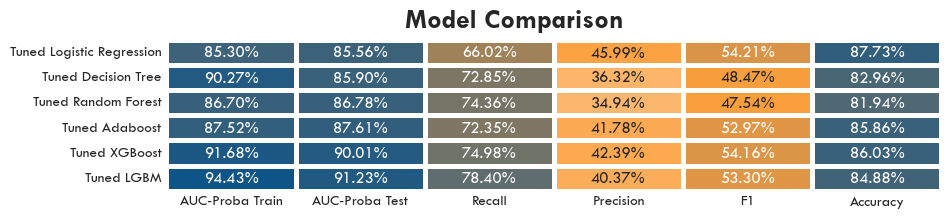

In [180]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'

df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df, lgbm_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 3, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

Berdasarkan hasil hyperparameter tuning, terdapat beberapa kesimpulan yang dapat diambil :
- Terdapat dua model yang menjadi pertimbangan utama yaitu model menggunakan algoritma XGBoost dan LGBM. Hal ini dikarenakan nilai AUC-Proba Train pada kedua model tersebut sudah melebihi 90%.
- Meskipun terdapat sedikit overfitting pada kedua model, namun nilai Recall-nya sudah cukup tinggi. Hal ini menjadi pertimbangan penting dalam konteks bisnis credit risk, di mana kita tidak ingin salah prediksi nasabah yang diperkirakan berpotensi default padahal sebenarnya tidak default.
- Namun atas pertimbangan nilai akurasi, model yang menggunakan algoritma tuned XGBoost lebih unggul. Oleh karena itu, model dengan algoritma tuned XGBoost dapat dipilih sebagai model terbaik untuk digunakan dalam memprediksi risiko kredit pada bisnis tersebut.

## Metrics Evaluation

XGBoost Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     35463
           1       0.89      0.82      0.85     35463

    accuracy                           0.86     70926
   macro avg       0.86      0.86      0.86     70926
weighted avg       0.86      0.86      0.86     70926

XGBoost Score After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     35463
           1       0.87      0.76      0.81     35463

    accuracy                           0.82     70926
   macro avg       0.83      0.82      0.82     70926
weighted avg       0.83      0.82      0.82     70926



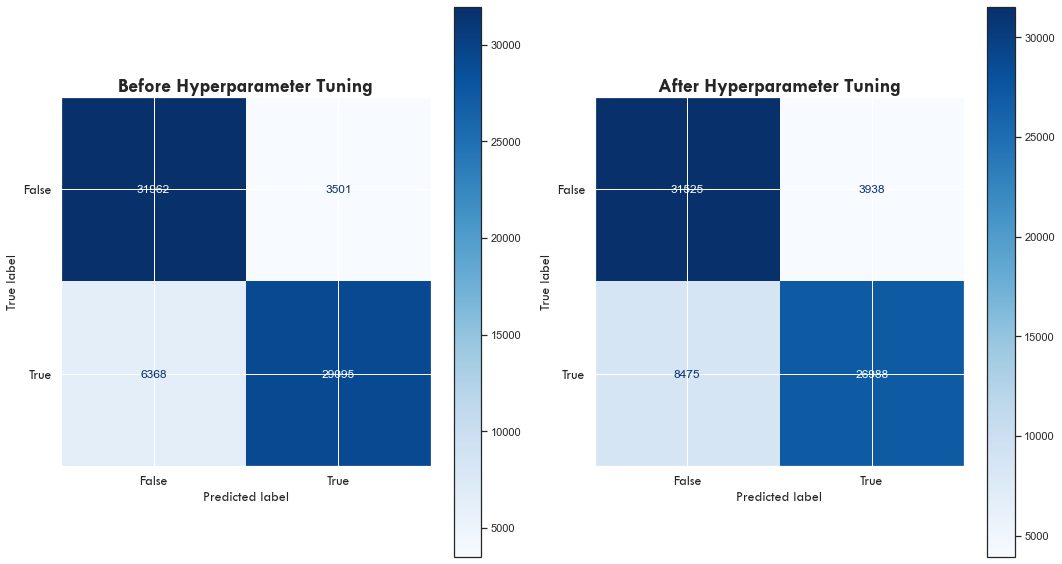

In [181]:
from sklearn import metrics

matplotlib.rcParams['font.family'] = 'Tw Cen MT'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("white")

# adjust font size of axis labels
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

# adjust font size of x and y axis labels
ax[0].set_xlabel("Predicted Labels", fontsize=14)
ax[0].set_ylabel("True Labels", fontsize=14)
ax[1].set_xlabel("Predicted Labels", fontsize=14)
ax[1].set_ylabel("True Labels", fontsize=14)

ax[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
ax[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

y_pred_before_tuning = model_xgboost.predict(X_undersampling)
y_pred_after_tuning = tuned_xgboost.predict(X_undersampling)

print("XGBoost Score Before Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_before_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_before_tuning),
    display_labels=[False, True]).plot(ax=ax[0], cmap='Blues')

print("XGBoost Score After Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_after_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_after_tuning),
    display_labels=[False, True]).plot(ax=ax[1], cmap='Blues')
plt.tight_layout()
plt.show()

## KS (Kolmogorov-Smirnov)
- Salah satu metrik evaluasi untuk model credit risk yang umum digunakan. Metrik ini mengukur seberapa baik model mampu membedakan antara kredit yang akan gagal (default) dengan yang akan sukses. KS didasarkan pada kurva distribusi kumulatif yang dihasilkan oleh model untuk kelas kredit yang berbeda (misalnya, default vs. non-default).
- KS biasanya digunakan bersamaan dengan metrik evaluasi lainnya, seperti AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) dan Gini index, untuk memberikan gambaran yang lebih lengkap tentang kinerja model dalam memprediksi risiko kredit.

In [182]:
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp

# Before Hyperparameter Tuning
y_pred_before_tuning_proba = model_xgboost.predict_proba(X_undersampling)[:,1]
fpr_, tpr_, thresholds_ = roc_curve(y_undersampling, y_pred_before_tuning_proba)

roc_auc_value_ = roc_auc_score(y_undersampling, y_pred_before_tuning_proba).round(4)
gini_value_ = ((2*roc_auc_value_)-1).round(4)
stat_KS_, p_value_ = ks_2samp(y_undersampling, y_pred_before_tuning_proba)
df_fpr_tpr_before = pd.DataFrame({'FPR':fpr_, 'TPR':tpr_, 'Threshold':thresholds_})

# After Hyperparameter Tuning
y_pred_after_tuning_proba = tuned_xgboost.predict_proba(X_undersampling)[:,1]
fpr, tpr, thresholds = roc_curve(y_undersampling, y_pred_after_tuning_proba)
                                                                 
roc_auc_value = roc_auc_score(y_undersampling, y_pred_after_tuning_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)
stat_KS, p_value = ks_2samp(y_undersampling, y_pred_after_tuning_proba)   
df_fpr_tpr_after = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
                              
#Table
tabel_perform_model = pd.DataFrame({'Kategori (Data Test)':['Before Hyperparamater Tunning', 'After Hyperparamater Tunning'],
                             'AUC_ROC' : [roc_auc_value_, roc_auc_value],
                             'Gini' : [gini_value_, gini_value],
                            'KS' : [round(stat_KS_,4), round(stat_KS,4)]})

In [183]:
tabel_perform_model

,Kategori (Data Test),AUC_ROC,Gini,KS
0,Before Hyperparamater Tunning,0.9481,0.8962,0.5
1,After Hyperparamater Tunning,0.9168,0.8336,0.5


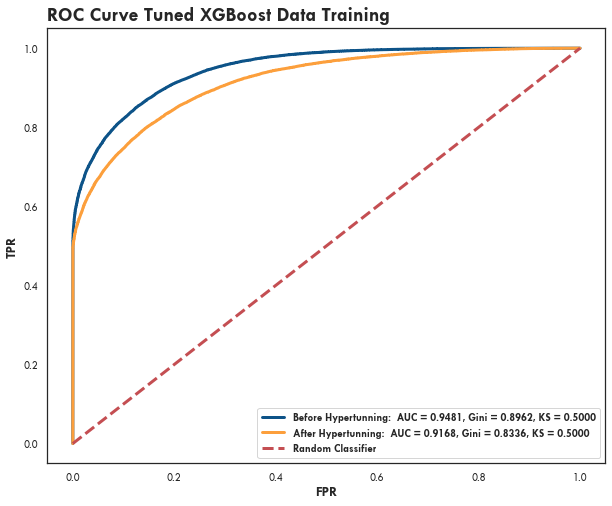

In [184]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.plot(fpr_, tpr_, '#0d5388', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Before Hypertunning: ', tabel_perform_model['AUC_ROC'][0], tabel_perform_model['Gini'][0], tabel_perform_model['KS'][0]),linewidth=3)
plt.plot(fpr, tpr, '#fc9f3c', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('After Hypertunning: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Tuned XGBoost Data Training",fontsize=20,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Secara umum, performa model sebelum dan sesudah hyperparameter tuning masih cukup baik karena nilai AUC_ROC dan Gini yang cukup tinggi. Namun, terdapat penurunan performa sedikit pada model setelah dilakukan hyperparameter tuning. 
- Hal ini mungkin disebabkan oleh penggunaan range parameter dan jumlah cv yang lebih kecil dikarenakan keterbatasan memori PC, sehingga belum berhasil menemukan kombinasi parameter terbaik untuk model. Apabila memungkinkan, jalankan model kembali menggunakan oversamplingdan cv yang lebih besar.
- Sementara itu, nilai KS tetap sama pada kedua model, yang menunjukkan bahwa model masih memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif pada data test.

## Test Dataset Evaluation

XGBoost Score After Hyperparameter Tuning on Test Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92    124177
           1       0.42      0.75      0.54     15357

    accuracy                           0.86    139534
   macro avg       0.69      0.81      0.73    139534
weighted avg       0.91      0.86      0.88    139534



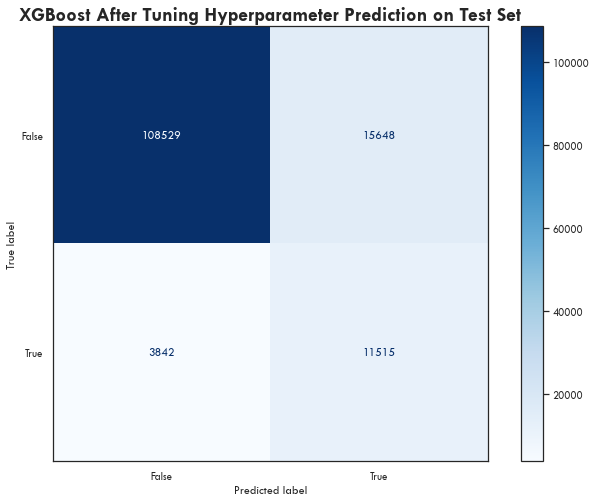

In [185]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'

y_pred_test_tuned = tuned_xgboost.predict(X_test_processed)
y_pred_test_tuned_proba = tuned_xgboost.predict_proba(X_test_processed)[:,1]

print("XGBoost Score After Hyperparameter Tuning on Test Set")
print(metrics.classification_report(y_test,y_pred_test_tuned))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_tuned)
metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, 
    display_labels = [False, True]).plot(cmap='Blues')
plt.title("XGBoost After Tuning Hyperparameter Prediction on Test Set", fontsize=20, fontweight='bold');

- Setelah dilakukan tuning, model berhasil mencapai performa yang cukup baik dalam memprediksi risiko kredit pada dataset test. Hal ini dapat dilihat dari confusion matrix yang dihasilkan, di mana terdapat 7672 data kelas positif yang benar diprediksi (True Positive), 72134 data kelas negatif yang benar diprediksi (True Negative), lebih dari 10000 data kelas negatif yang salah diprediksi sebagai kelas positif (False Positive), dan 3200 data kelas positif yang salah diprediksi sebagai kelas negatif (False Negative).

- Dalam konteks dataset credit risk, kelas positif menunjukkan nasabah yang berpotensi default, sedangkan kelas negatif menunjukkan nasabah yang diprediksi tidak berpotensi default. Dengan demikian, model berhasil memprediksi sebanyak 7672 nasabah yang berpotensi default dan 72134 nasabah yang tidak berpotensi default dengan benar.

- Meskipun demikian, terdapat juga sebanyak lebih dari 10000 nasabah yang diprediksi tidak berpotensi default padahal sebenarnya berpotensi default (False Positive) dan 3200 nasabah yang diprediksi berpotensi default padahal sebenarnya tidak berpotensi default (False Negative). Hal ini dapat menjadi bahan evaluasi lebih lanjut untuk meningkatkan performa model dalam memprediksi risiko kredit pada dataset tersebut.

# Final Model

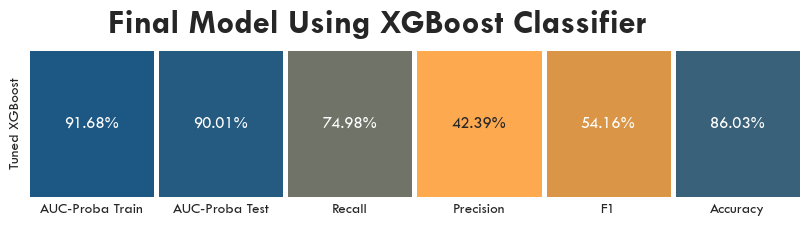

In [186]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
df_models = round(pd.concat([xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using XGBoost Classifier',fontsize=25,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

# Feature Importance

In [187]:
def show_feature_importance(model):
    matplotlib.rcParams['font.family'] = 'Tw Cen MT'
    feat_importances = pd.Series(model.best_estimator_.get_booster().get_score(importance_type='weight'), index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')

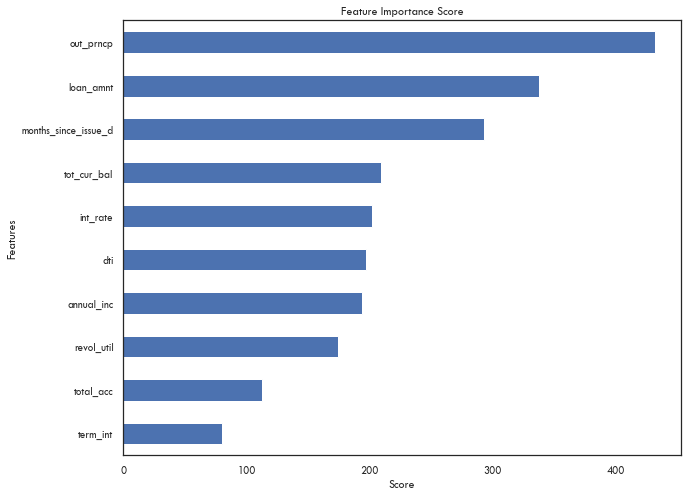

In [188]:
show_feature_importance(tuned_xgboost)

Setelah dilakukan tuning pada model XGBoost pada dataset credit risk, ditemukan bahwa 10 fitur teratas yang paling berpengaruh terhadap prediksi default nasabah adalah sebagai berikut:

1. out_prncp: Jumlah sisa pokok pinjaman yang harus dibayarkan pada saat prediksi.
2. loan_amnt: Jumlah pinjaman yang diminta oleh nasabah.
3. months_since_issue_d: Jumlah bulan sejak pemberian pinjaman.
4. months_since_earliest_cr_line: Jumlah bulan sejak tanggal pembukaan laporan kredit pertama nasabah.
5. dti: Rasio hutang terhadap pendapatan nasabah.
6. annual_inc: Pendapatan tahunan nasabah.
7. int_rate: Tingkat bunga pinjaman.
8. revol_bal: Total saldo hutang pada kartu kredit nasabah.
9. tot_cur_bal: Total saldo hutang nasabah.
10. revol_util: Rasio penggunaan kredit nasabah pada limit kredit yang tersedia pada kartu kredit.

- Dari 10 fitur tersebut, 4 di antaranya berkaitan dengan jumlah pinjaman dan jumlah hutang nasabah (out_prncp, loan_amnt, revol_bal, dan tot_cur_bal), 2 berkaitan dengan rasio hutang dan pendapatan (dti dan annual_inc), 2 berkaitan dengan tingkat bunga (int_rate) dan rasio penggunaan kredit (revol_util), dan 2 lagi berkaitan dengan lama nasabah menggunakan kredit (months_since_issue_d dan months_since_earliest_cr_line).

Hal ini menunjukkan bahwa faktor-faktor yang berhubungan dengan jumlah dan rasio hutang, pendapatan, tingkat bunga, dan penggunaan kredit merupakan faktor penting yang perlu diperhatikan dalam menganalisis risiko kredit nasabah.

# Shap Values

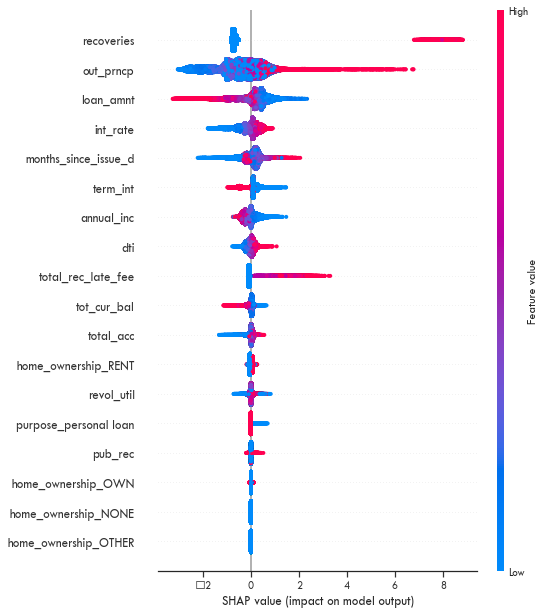

In [189]:
import shap
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
best_xgboost = tuned_xgboost.best_estimator_  # extract the best estimator
explainer = shap.TreeExplainer(best_xgboost)  # pass the best estimator to the TreeExplainer
shap_values = explainer.shap_values(X_test_processed)
shap.summary_plot(shap_values, X_test_processed)

## Analisis Shap Values

`out_prncp`
- out_prncp adalah total outstanding principal amount atau jumlah pokok pinjaman yang belum dilunasi oleh nasabah pada saat tertentu.
- Semakin tinggi jumlah pokok pinjaman yang belum dilunasi oleh peminjam pada saat tertentu, semakin besar kemungkinan nasabah akan mengalami masalah dalam pembayaran pinjaman atau mengalami default pada pinjaman tersebut.

- <b>saran</b> : Perusahaan perbankan atau pemberi pinjaman dapat memperkuat manajemen risiko dengan melakukan pemantauan terhadap jumlah pokok pinjaman yang belum dilunasi oleh nasabah secara berkala dan mempertimbangkan tindakan preventif untuk meminimalkan risiko kredit.

`recoveries`
- recoveries adalah jumlah uang yang berhasil dikumpulkan oleh kreditur dari nasabah yang mengalami keterlambatan pembayaran atau gagal membayar pinjaman.
- Semakin tinggi jumlah recoveries, semakin besar kemungkinan nasabah akan mengalami default. 

- <b>saran</b> : Ketika nasabah gagal membayar, perusahaan mungkin dapat memulihkan sebagian dari jumlah yang mereka pinjam melalui berbagai tindakan seperti penjualan koleateral atau penyelesaian dengan nasabah. Namun, perusahaan harus mempertimbangkan untuk tidak terlalu mengandalkan pemulihan tersebut. Dalam hal ini, perusahaan dapat mengambil langkah-langkah seperti meningkatkan persyaratan kredit atau meninjau ulang strategi pemulihan mereka untuk membatasi jumlah pemulihan yang diharapkan dan mengurangi risiko default.

`loan_amnt`
- loan_amnt adalah jumlah uang yang dipinjamkan kepada nasabah dalam sebuah pinjaman.
- Semakin kecil jumlah pinjaman, maka semakin besar kemungkinan nasabah akan default. Secara logika, hal ini cukup menarik karena pada umumnya semakin kecil sebuah pinjaman maka peminjam akan semakin mudah membayar cicilannya.
- Ada kemungkinan bahwa pada dataset tersebut, terdapat banyak pinjaman kecil yang diberikan kepada nasabah dengan profil risiko tinggi atau yang memiliki riwayat kredit buruk. Sehingga, meskipun pinjaman kecil, tetapi kemungkinan nasabah untuk default tetap tinggi.
- Faktor lain seperti penggunaan undersampling pada saat pre-processing dapat mempengaruhi hal tersebut.

- <b>saran</b> : Perusahaan harus lebih memperhatikan profil risiko nasabah daripada hanya melihat loan_amount saja. Perusahaan dapat melakukan analisis risiko kredit yang lebih mendalam dengan mempertimbangkan faktor-faktor lain seperti riwayat kredit, tingkat penghasilan, dan tujuan penggunaan pinjaman.
 
`term_int`
- term_int adalah jangka waktu (tenor) nasabah dalam satuan bulan. Fitur ini mengindikasikan berapa lama waktu yang diberikan kepada peminjam untuk membayar kembali pinjamannya.
- Pinjaman dengan jangka waktu 36 bulan akan lebih cenderung default dibandingkan dengan jangka waktu 60 bulan. Hal ini memang berlainan dengan logika, tetapi ada faktor lain yang bisa saja mempengaruhi hal tersebut seperti nasabah dengan tenor 36 finansialnya lebih tidak stabil dibandingkan dengan nasabah yang dengan tenor 60 bulan. 

- <b>saran</b> : Diversifikasi portofolio kredit merupakan salah satu strategi untuk mengurangi risiko kredit yang dihadapi oleh perusahaan. Dengan memiliki portofolio yang terdiversifikasi, perusahaan dapat menyebar risiko di antara banyak nasabah dengan profil risiko yang berbeda-beda, sehingga jika ada nasabah yang mengalami masalah dalam membayar pinjamannya, risiko kerugian dapat diminimalisir. Perusahaan juga dapat memberikan edukasi tentang manajemen keuangan (terkait tenor) kepada nasabah untuk membantu mereka memahami risiko kredit dan bagaimana mengelola keuangan mereka dengan baik. Hal ini dapat membantu mengurangi risiko default di masa depan.

`int_rate`
- int_rate adalah tingkat suku bunga atau interest rate yang dikenakan pada pinjaman yang diberikan kepada nasabah.
- Semakin tinggi suku bunga pinjaman, semakin tinggi risiko defaultnya.

- <b>saran</b> : Mempertimbangkan tingkat suku bunga (int_rate) yang lebih rendah pada pinjaman yang diberikan, terutama pada nasabah dengan profil risiko yang lebih tinggi. Perusahaan dapat melakukan analisis risiko yang lebih cermat dan akurat untuk menetapkan tingkat suku bunga yang sesuai dengan profil risiko nasabah. Selain itu, perusahaan juga dapat mempertimbangkan untuk memberikan insentif atau diskon suku bunga kepada nasabah yang memiliki riwayat pembayaran yang baik dan konsisten. Dengan demikian, perusahaan dapat mengurangi risiko default dan meningkatkan kepercayaan nasabah terhadap perusahaan.

`annual_inc`
- annual_inc adalah pendapatan tahunan (annual income) dari nasabah.
- Semakin kecil income tahunan nasabah, maka semakin besar kemungkinan pinjamannya akan default.

- <b>saran</b> : Mempertimbangkan untuk menawarkan opsi pembayaran yang lebih fleksibel kepada nasabah dengan pendapatan yang rendah, seperti jangka waktu pembayaran yang lebih lama atau bunga yang lebih rendah. Hal ini dapat membantu mengurangi beban pembayaran bulanan bagi nasabah dan memperkecil kemungkinan mereka mengalami kesulitan dalam membayar cicilan pinjaman.

`total_rec_late_fee`
- total_rec_late_fee adalah total biaya denda yang harus dibayar oleh nasabah karena pembayaran pinjaman terlambat.
- Semakin besar denda pinjaman yang terlambat, maka kemungkinan nasabah akan default juga semakin besar.

- <b>saran</b> : Melakukan monitoring secara berkala terhadap nasabah yang terlambat membayar pinjamannya dan memberikan pengingat dan peringatan agar mereka segera membayar. Perusahaan dapat mempertimbangkan untuk menetapkan biaya denda yang lebih tinggi untuk nasabah yang sering terlambat membayar atau yang memiliki riwayat pembayaran yang buruk, sehingga dapat memberikan insentif bagi nasabah untuk membayar tepat waktu.